# Heart Disease Prediction - Group 9

Group Members:


*   Barış Baran AYDOĞAN 28425
*   Mehmet Talha GÜVEN 27829
*   Egehan IŞILDAR 25281





# **Introduction**

The dataset “Heart Disease Prediction” refers to the presence of heart disease in the patient. There are several reasons why the dataset “Heart Disease Prediction” was collected based on this research: Firstly, the data was collected in the light of which attributes of patients are more effective on having a heart disease. Secondly, to find out relationship between different attributes and final disease statement. As a consequence, our first aim is determine which main attributes are cause to having a heart disease, after that we aim to examine relationship between selected attributes and heart disease statement. 

We will focus on analyzing the variables and determining the relationships between them. Our end goal is creating a machine learning model which will determine what attributes are crucial for heart disease.

### Drive mounting 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# ****Utilized Dataset****

### **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import ttest_ind, ttest_ind_from_stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV




%matplotlib inline

### Datasets


*   Heart Disease Dataset is downloaded from https://www.kaggle.com/datasets/meetnagadia/heart-disease

*   Stroke Prediction Dataset (Additional Dataset) https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset







In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS210/HeartDisease_CS210Project/heart_disease.csv')



In [ ]:
df['HeartDisease'] = df.AHD.astype('category')
df['ChestPainType'] = df.ChestPain.astype('category')
df['ExerciseAngina'] = df.ExAng.astype('category')

In [ ]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [ ]:
df.shape

(303, 17)

In [ ]:
df.dtypes

Age                  int64
Sex                  int64
ChestPain           object
RestBP               int64
Chol                 int64
Fbs                  int64
RestECG              int64
MaxHR                int64
ExAng                int64
Oldpeak            float64
Slope                int64
Ca                 float64
Thal                object
AHD                 object
HeartDisease      category
ChestPainType     category
ExerciseAngina    category
dtype: object

In [ ]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,HeartDisease,ChestPainType,ExerciseAngina
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,No,typical,0
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,Yes,asymptomatic,1
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Yes,asymptomatic,1
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,No,nonanginal,0
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,No,nontypical,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             303 non-null    int64   
 1   Sex             303 non-null    int64   
 2   ChestPain       303 non-null    object  
 3   RestBP          303 non-null    int64   
 4   Chol            303 non-null    int64   
 5   Fbs             303 non-null    int64   
 6   RestECG         303 non-null    int64   
 7   MaxHR           303 non-null    int64   
 8   ExAng           303 non-null    int64   
 9   Oldpeak         303 non-null    float64 
 10  Slope           303 non-null    int64   
 11  Ca              299 non-null    float64 
 12  Thal            301 non-null    object  
 13  AHD             303 non-null    object  
 14  HeartDisease    303 non-null    category
 15  ChestPainType   303 non-null    category
 16  ExerciseAngina  303 non-null    category
dtypes: category(3), 

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPain         0
RestBP            0
Chol              0
Fbs               0
RestECG           0
MaxHR             0
ExAng             0
Oldpeak           0
Slope             0
Ca                4
Thal              2
AHD               0
HeartDisease      0
ChestPainType     0
ExerciseAngina    0
dtype: int64

 **-> Missing Value Treatment**



In [ ]:
#Missing Values Treatment
df['Ca'].fillna(0,inplace = True)
df['Thal'].fillna("normal",inplace = True)

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPain         0
RestBP            0
Chol              0
Fbs               0
RestECG           0
MaxHR             0
ExAng             0
Oldpeak           0
Slope             0
Ca                0
Thal              0
AHD               0
HeartDisease      0
ChestPainType     0
ExerciseAngina    0
dtype: int64

#****Exploratory Data Analysis****

In [ ]:
df
df["Sex"].replace(0, 'Female',inplace=True)
df["Sex"].replace(1, 'Male',inplace=True)



In [ ]:
def histogram(col, title):
  plt.figure(figsize = (12,8))
  ax = sns.histplot(col, kde=False)
  values = np.array([patch.get_height() for patch in ax.patches])
  norm = plt.Normalize(values.min(), values.max())
  colors = plt.cm.RdBu_r(norm(values))

  for patch, color in zip(ax.patches, colors):
    patch.set_color(color)

  plt.title(title, size = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eb19c29d0>,
      dtype=object)

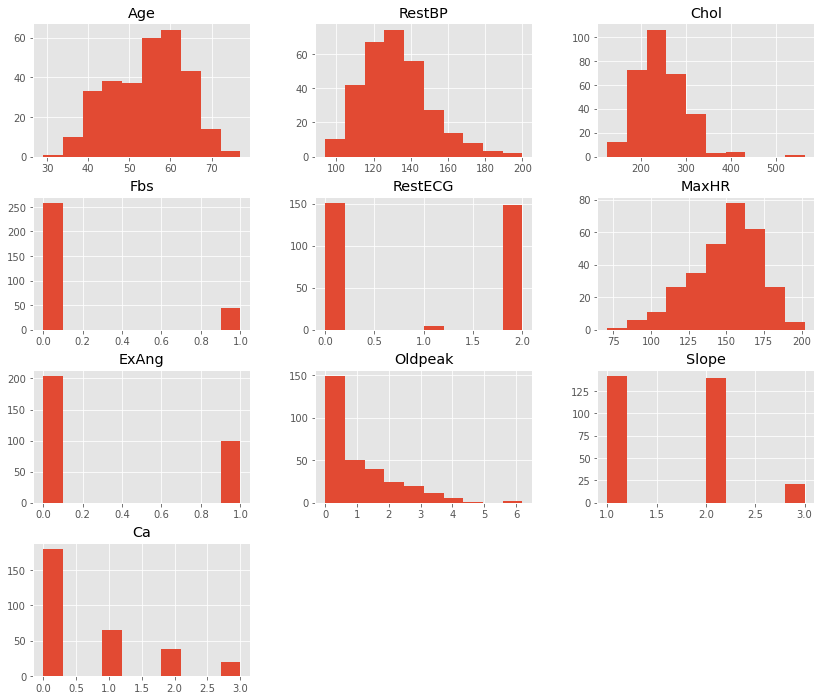

In [ ]:
df.corr()
exclude = []
df.loc[:, df.columns.difference(exclude)].hist(figsize = (14,12)) 


In [ ]:
categorical_list = ["Sex","Fbs","RestECG","ExAng","Slope","Ca", "RestBP", "Oldpeak", "ChestPain", "HeartDisease"]

categorical_list2 = ["Fbs","ExAng", "Age", "Sex", "RestECG","Slope"]


Text(0.5, 1.0, 'Chest Pain / Heart Disease')

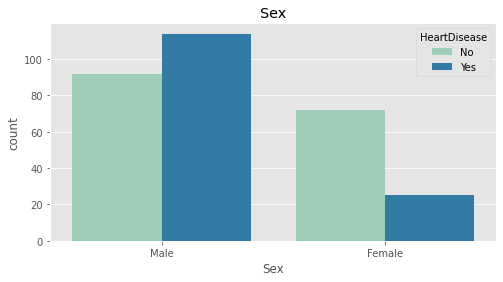

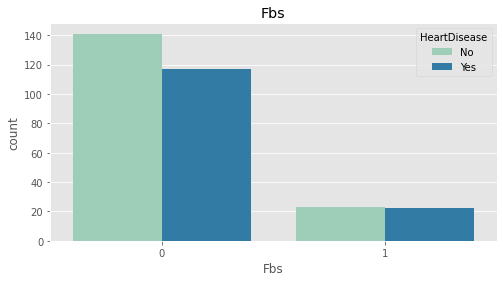

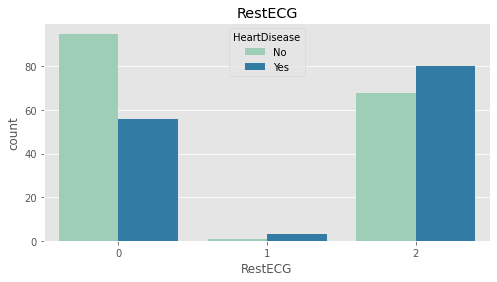

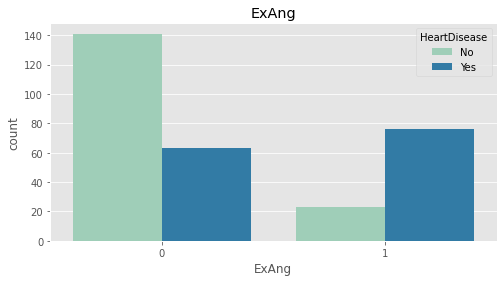

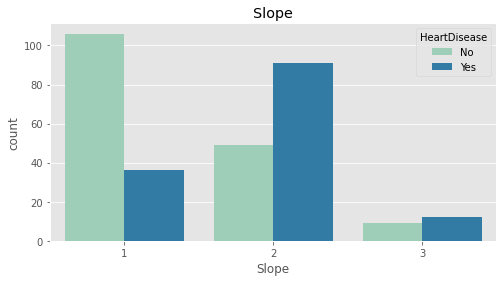

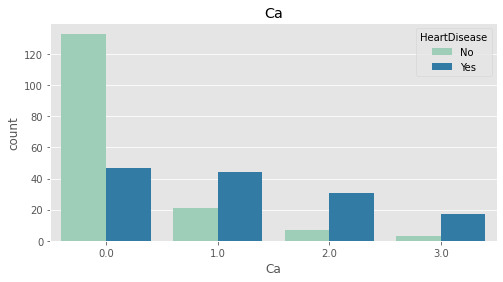

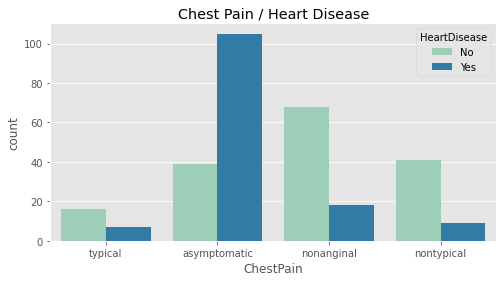

In [ ]:
#Sex
plt.figure(figsize = (8,4))
sns.countplot(x = "Sex", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Sex")
#Fbs
plt.figure(figsize = (8,4))
sns.countplot(x = "Fbs", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Fbs")
#RestECG
plt.figure(figsize = (8,4))
sns.countplot(x = "RestECG", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("RestECG")
#ExAng
plt.figure(figsize = (8,4))
sns.countplot(x = "ExAng", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("ExAng")
#Slope
plt.figure(figsize = (8,4))
sns.countplot(x = "Slope", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Slope")
#Ca
plt.figure(figsize = (8,4))
sns.countplot(x = "Ca", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Ca")
#ChestPain
plt.figure(figsize = (8,4))
sns.countplot(x = "ChestPain", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Chest Pain / Heart Disease")

Text(0.5, 1.0, 'RestBP')

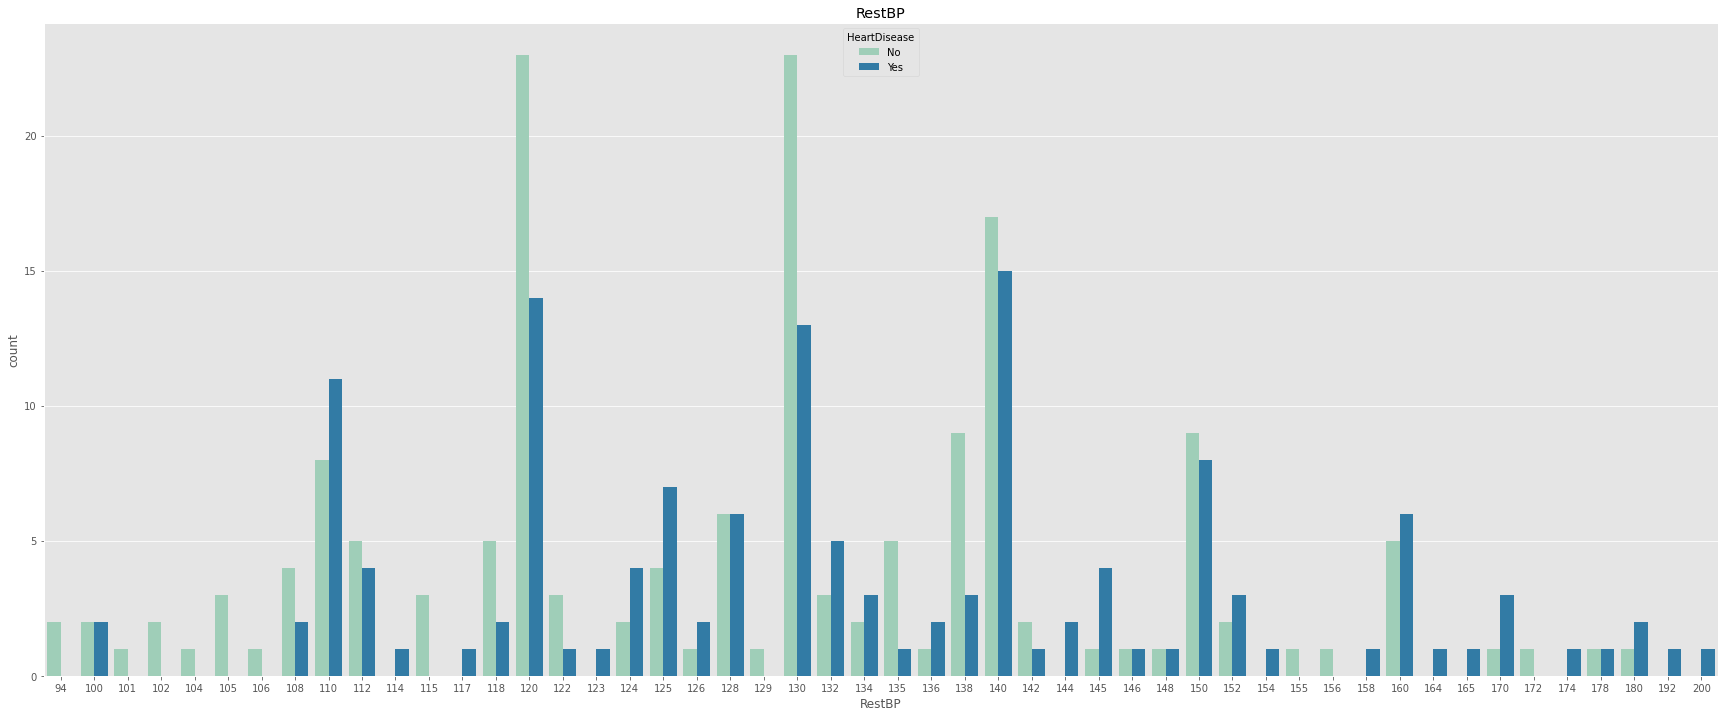

In [ ]:
#RestBP
plt.figure(figsize = (30,12))
sns.countplot(x = "RestBP", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("RestBP")

Text(0.5, 1.0, 'Oldpeak')

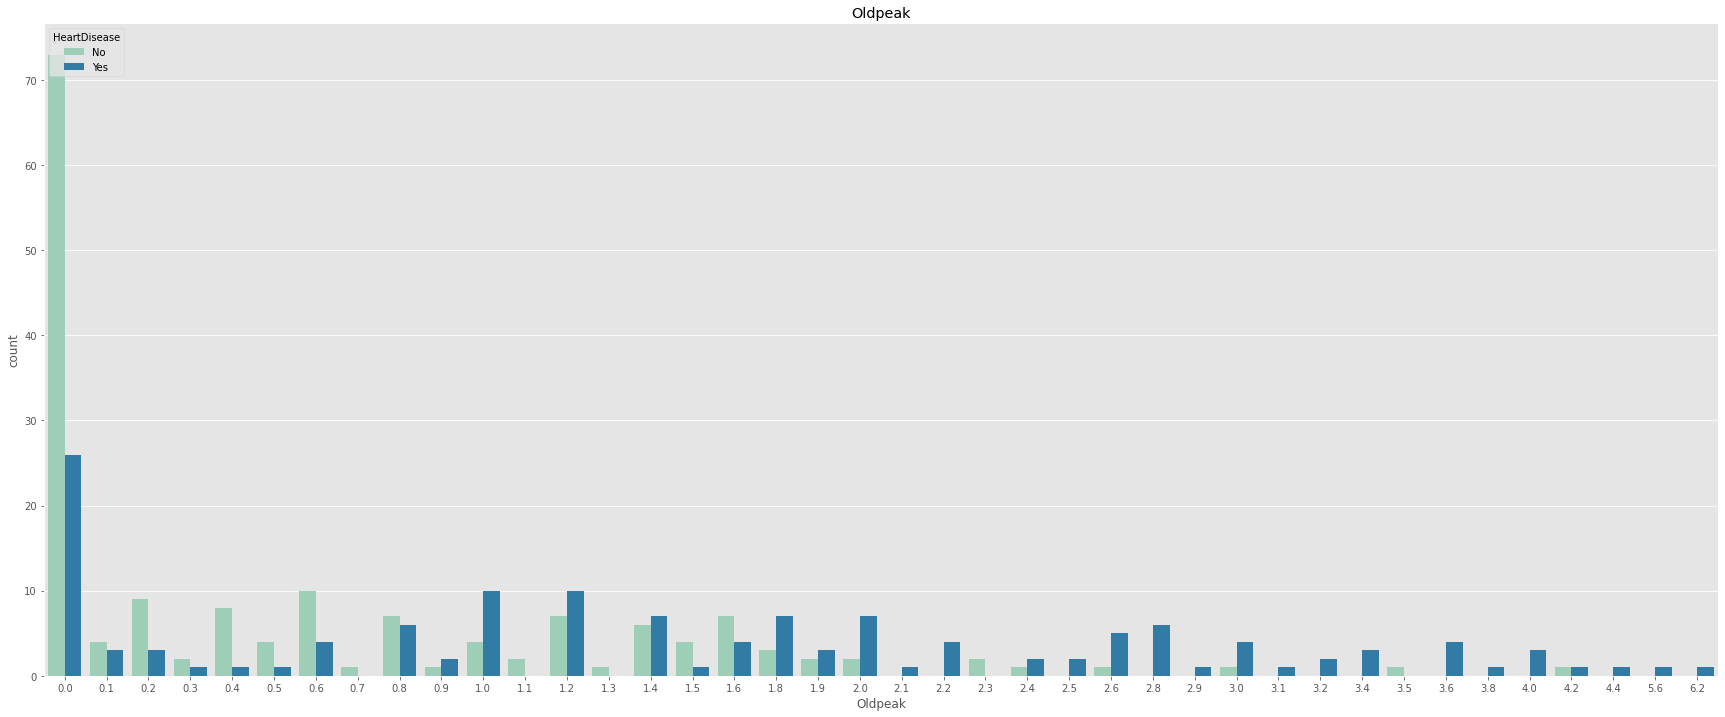

In [ ]:
#OldPeak
plt.figure(figsize = (30,12))
sns.countplot(x = "Oldpeak", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Oldpeak")

<Figure size 2520x864 with 0 Axes>

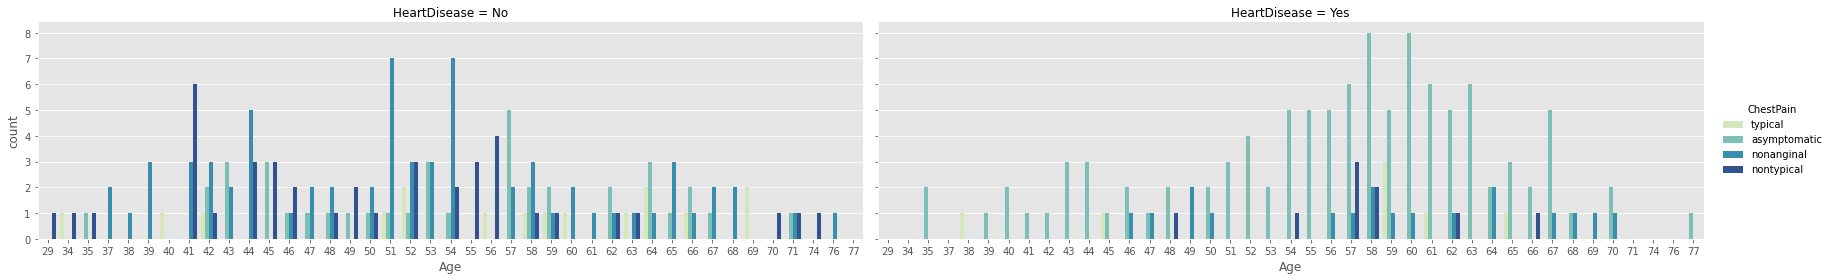

In [ ]:
# Chest Pain Types when comparing with Age and Heart Disease
categorical_list5 = ["ChestPain", "Age", "Sex", "ExAng", "HeartDisease"]
df_categoric = df.loc[:, categorical_list5]
plt.figure(figsize = (35,12))
g = sns.catplot(x = "Age", data = df, col = "HeartDisease" ,hue = "ChestPain", kind = "count",height=4, aspect=3, palette = "YlGnBu")

<Figure size 2520x864 with 0 Axes>

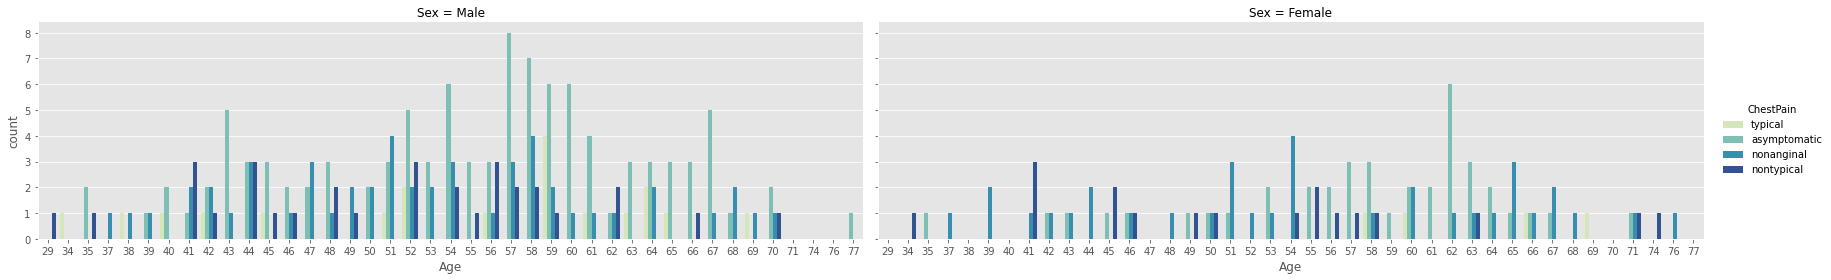

In [ ]:
# Chest Pain Types when comparing with Age and Gender
categorical_list6 = ["ChestPain", "Age", "Sex", "ExAng"]
df_categoric = df.loc[:, categorical_list6]
plt.figure(figsize = (35,12))
g = sns.catplot(x = "Age", data = df, col = "Sex" ,hue = "ChestPain", kind = "count",height=4, aspect=3, palette = "YlGnBu")

<Figure size 2520x864 with 0 Axes>

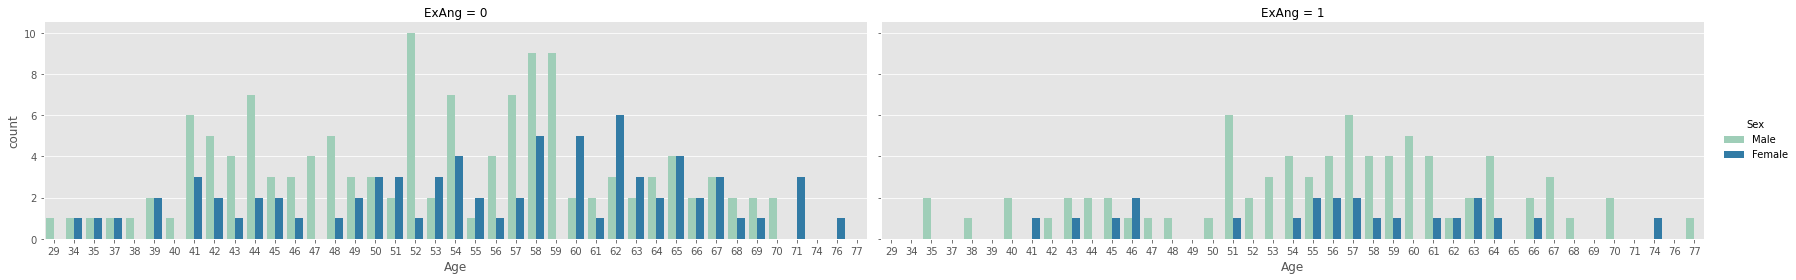

In [ ]:
# ExAng when comparing with Age and Gender
categorical_list3 = ["Fbs", "Age", "Sex", "ExAng"]
df_categoric = df.loc[:, categorical_list3]

plt.figure(figsize = (35,12))
g = sns.catplot(x = "Age", data = df, col = "ExAng" ,hue = "Sex", kind = "count",height=4, aspect=3, palette = "YlGnBu")


<Figure size 2880x864 with 0 Axes>

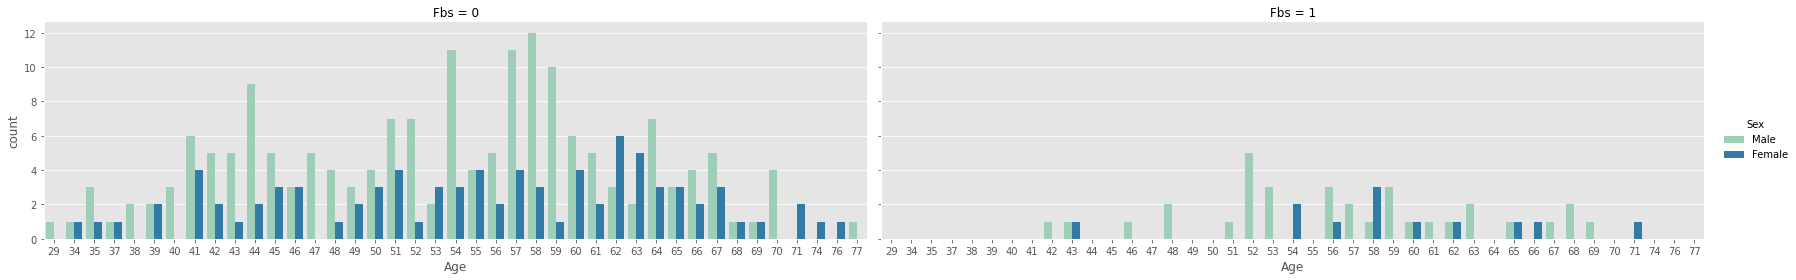

In [ ]:
# Fbs when comparing with Age and Gender


plt.figure(figsize = (40,12))
g = sns.catplot(x = "Age", data = df, col = "Fbs",hue = "Sex", kind = "count",height=4, aspect=3, palette = "YlGnBu")


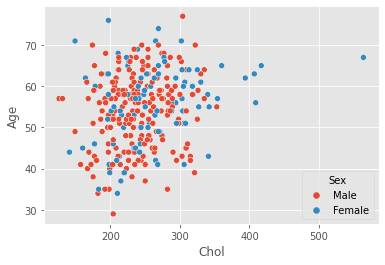

In [ ]:
# Scatter Plot graph of Chol with respect to Age and Sex
sns.scatterplot(data=df, x="Chol", y="Age", hue="Sex")


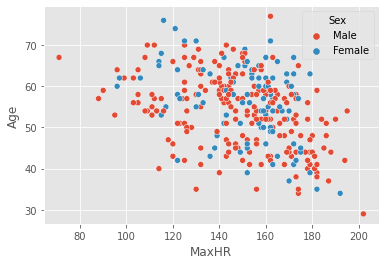

In [ ]:
# Scatter Plot graph of MaxHR with respect to Age and Sex
sns.scatterplot(data=df, x="MaxHR", y="Age", hue="Sex")


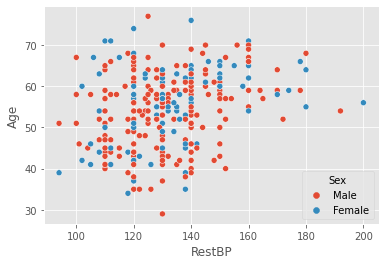

In [ ]:
# Scatter Plot graph of RestBP with respect to Age and Sex
sns.scatterplot(data=df, x="RestBP", y="Age", hue="Sex")

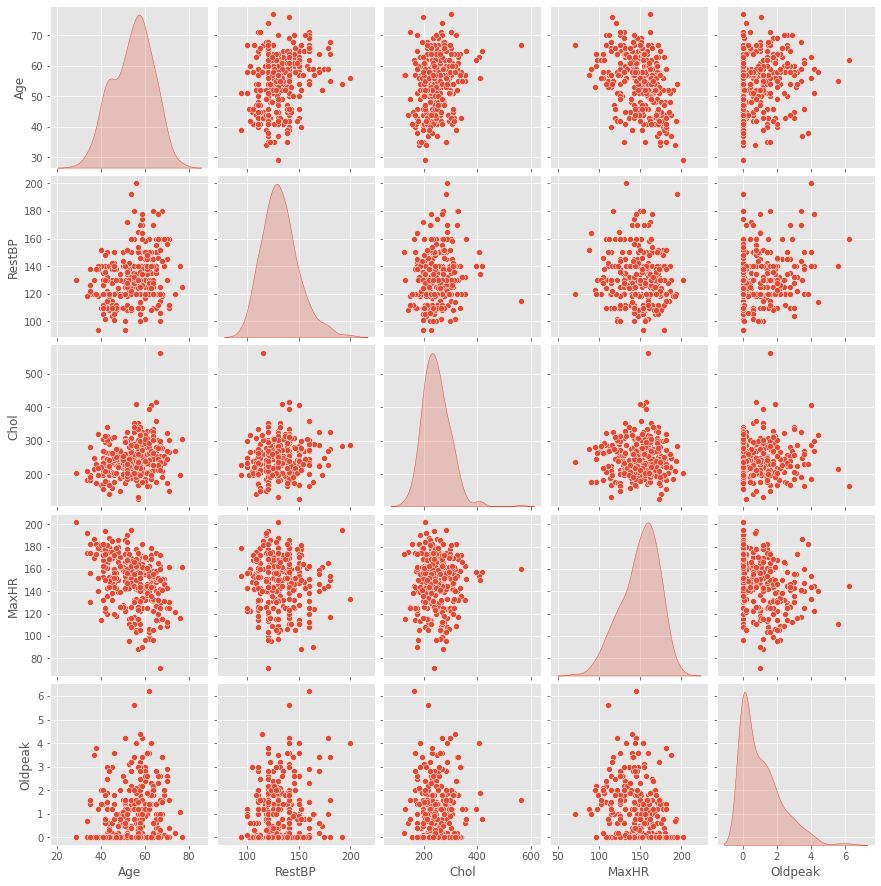

In [ ]:
# Pair Correleation Scatter Plots for each attiributes

from sklearn.preprocessing import StandardScaler, MinMaxScaler
numeric_list = ["Age","RestBP", "Chol", "MaxHR", "Oldpeak"]
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, diag_kind = "kde")

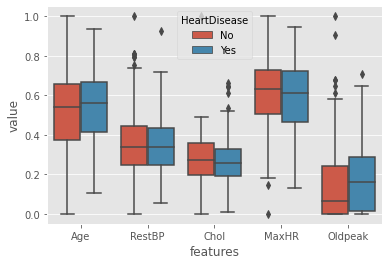

In [ ]:
# Box Plot Represantation for correlation of some selected features -Age, RestBP, Chol, MaxHR, Oldpeak- with Heart Disease.

#***here was female change

scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df_numeric)
df_scaled_array = pd.DataFrame(scaled_array, columns = numeric_list)

df_scaled_array = pd.concat([df_scaled_array, df.loc[:, "HeartDisease"]], axis = 1)

data_melted = pd.melt(df_scaled_array, id_vars = "HeartDisease", var_name = "features", value_name = "value")

# box plot
plt.figure()

sns.boxplot(x = "features", y = "value", hue = "HeartDisease", data= data_melted)
plt.show()

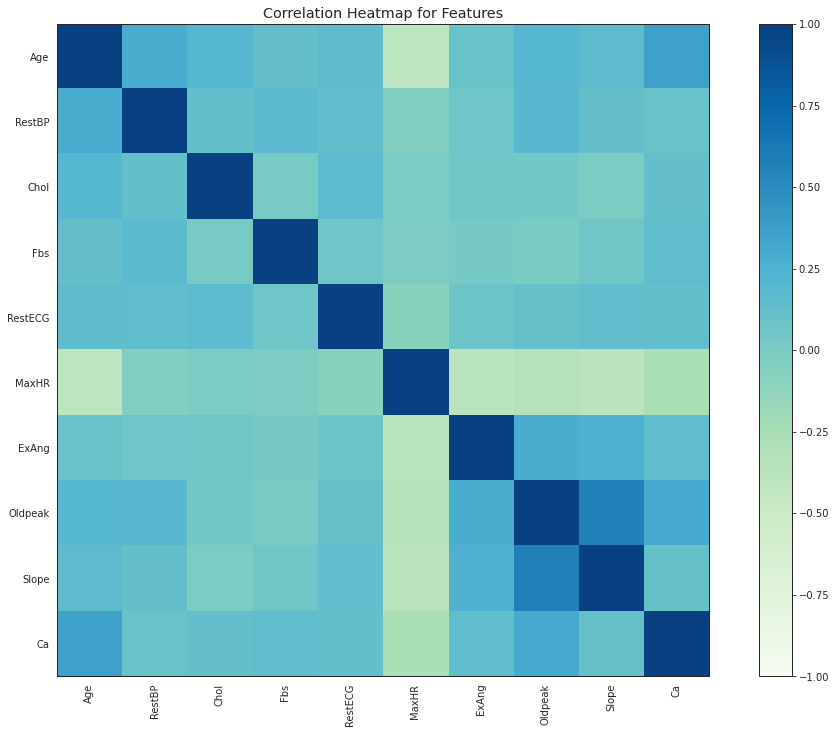

In [ ]:
# Another representation for showing the relationship/correlation between features
plt.figure(figsize = (18,12))
sns.set_style("white")
plt.imshow(df.corr(), cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(df.corr())),df.corr().columns, rotation=90)
plt.yticks(range(len(df.corr())),df.corr().index)
plt.title('Correlation Heatmap for Features')
plt.show()

<Figure size 8000x8000 with 0 Axes>

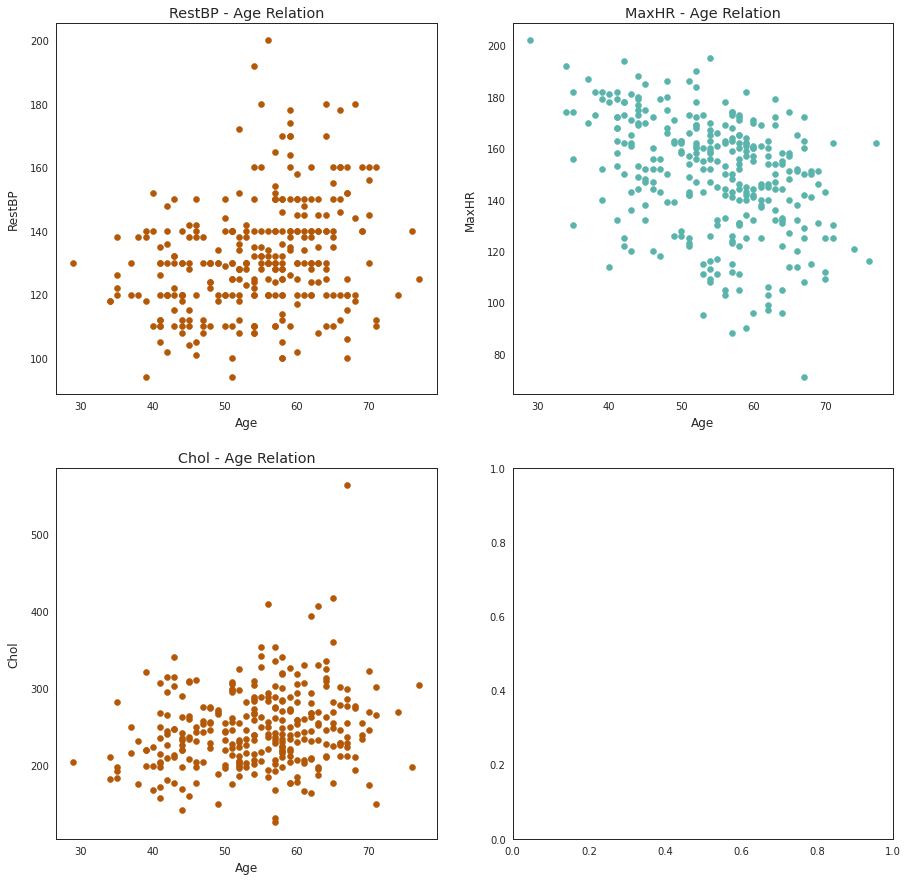

In [ ]:
# Age and some selected features -RestBP, MaxHR, Chol- relationship representation via scatter plot

f = plt.figure(figsize = (100,100), dpi= 80)
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = False, figsize=(15,15))
norm=plt.Normalize(-300, 300)


axes[0][0].scatter(df.Age ,df.RestBP, marker = 'o',color="#b35806" )
axes[0][0].set_ylabel('RestBP', labelpad = 10)
axes[0][0].set_xlabel('Age', labelpad = 5)
axes[0][0].set_title('RestBP - Age Relation')

axes[0][1].scatter(df.Age ,df.MaxHR, marker = 'o',color="#5ab4ac" )
axes[0][1].set_ylabel('MaxHR', labelpad = 10)
axes[0][1].set_xlabel('Age', labelpad = 5)
axes[0][1].set_title('MaxHR - Age Relation')

axes[1][0].scatter(df.Age ,df.Chol, marker = 'o',color="#b35806" )
axes[1][0].set_ylabel('Chol', labelpad = 10)
axes[1][0].set_xlabel('Age', labelpad = 5)
axes[1][0].set_title('Chol - Age Relation')


plt.show()

Text(0.5, 1.0, 'Chest Pain / RestBP')

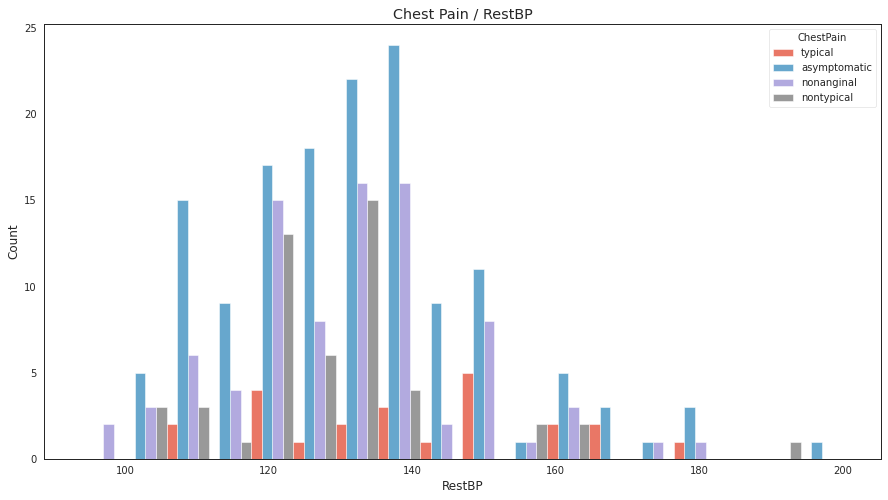

In [ ]:
#Distribution of people with respect to Chest Pain Types and RestBP
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="RestBP", hue="ChestPain", multiple="dodge", shrink=1)
plt.title("Chest Pain / RestBP")

Text(0.5, 1.0, 'Chest Pain / Chol')

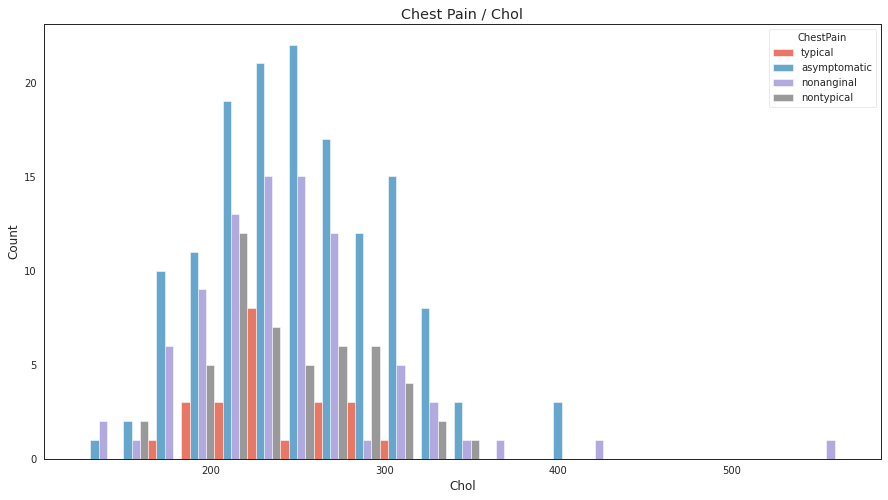

In [ ]:
#Distribution of people with respect to Chest Pain Types and Chol
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Chol", hue="ChestPain", multiple="dodge", shrink=1)
plt.title("Chest Pain / Chol")

Text(0.5, 1.0, 'Chest Pain / Fbs')

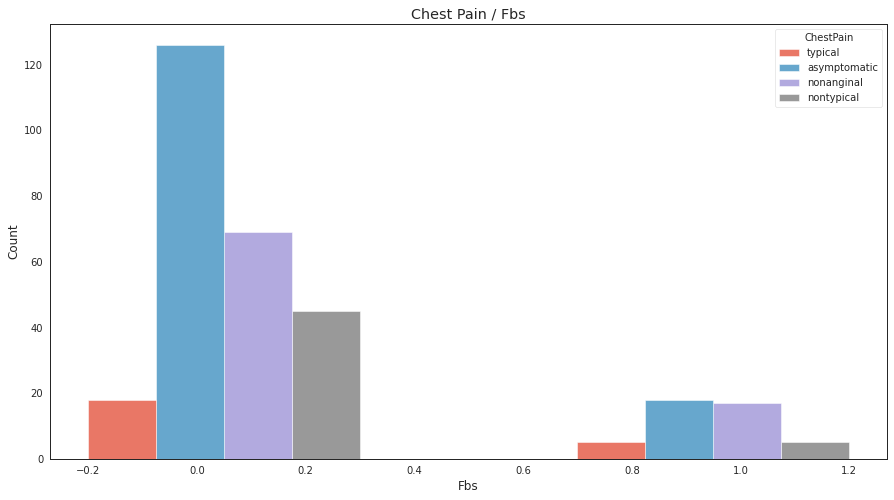

In [ ]:
#Distribution of people with respect to Chest Pain Types and Fbs
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Fbs", hue="ChestPain", multiple="dodge", shrink=5)
plt.title("Chest Pain / Fbs")

Text(0.5, 1.0, 'Chest Pain / RestECG')

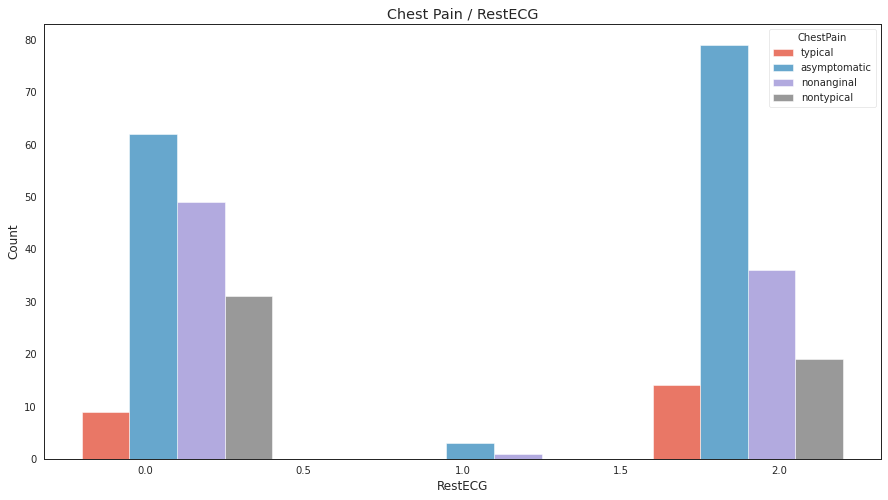

In [ ]:
#Distribution of people with respect to Chest Pain Types and RestECG
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="RestECG", hue="ChestPain", multiple="dodge", shrink=3)
plt.title("Chest Pain / RestECG")

Text(0.5, 1.0, 'Chest Pain / MaxHR')

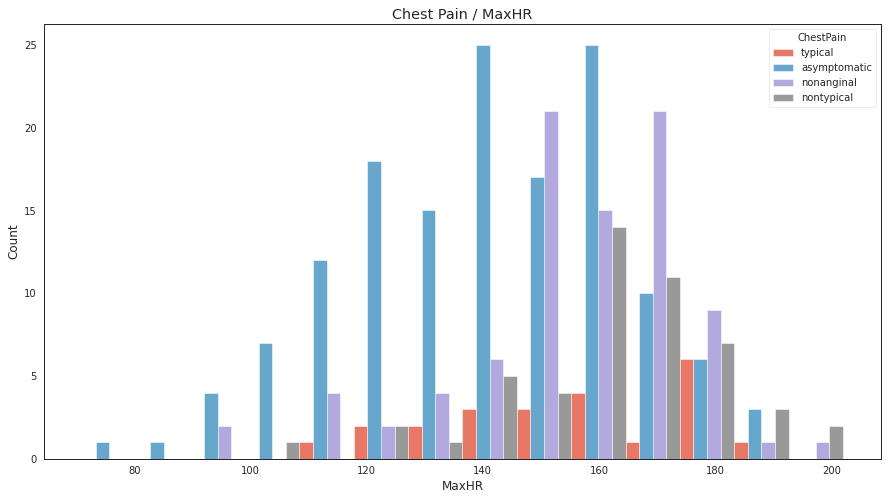

In [ ]:
#Distribution of people with respect to Chest Pain Types and MaxHR
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="MaxHR", hue="ChestPain", multiple="dodge", shrink=1)
plt.title("Chest Pain / MaxHR")

Text(0.5, 1.0, 'Chest Pain / ExAng')

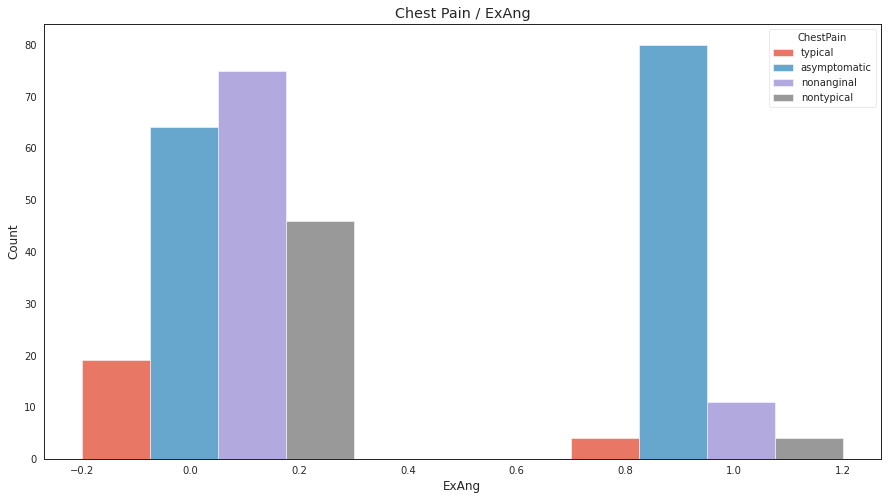

In [ ]:
#Distribution of people with respect to Chest Pain Types and ExAng
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="ExAng", hue="ChestPain", multiple="dodge", shrink=5)
plt.title("Chest Pain / ExAng")

Text(0.5, 1.0, 'Chest Pain / Oldpeak')

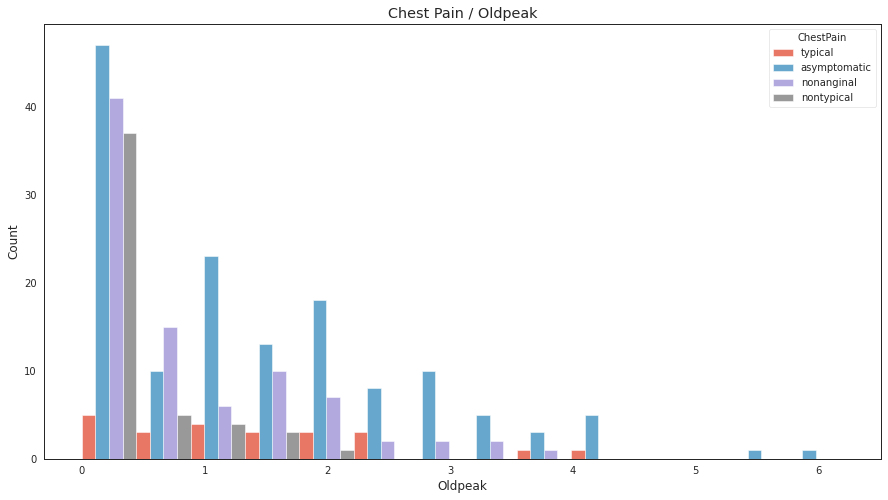

In [ ]:
#Distribution of people with respect to Chest Pain Types and Oldpeak
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Oldpeak", hue="ChestPain", multiple="dodge", shrink=1)
plt.title("Chest Pain / Oldpeak")

Text(0.5, 1.0, 'Chest Pain / Slope')

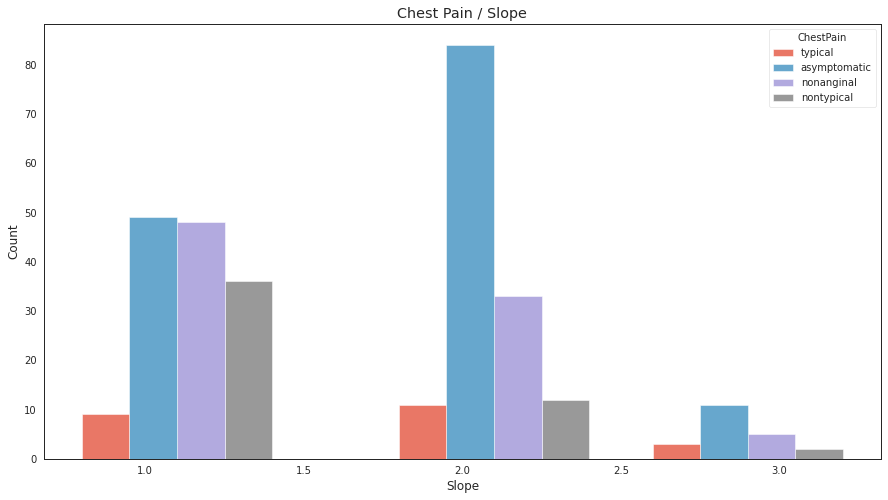

In [ ]:
#Distribution of people with respect to Chest Pain Types and Slope
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Slope", hue="ChestPain", multiple="dodge", shrink=3)
plt.title("Chest Pain / Slope")

Text(0.5, 1.0, 'Chest Pain / Ca')

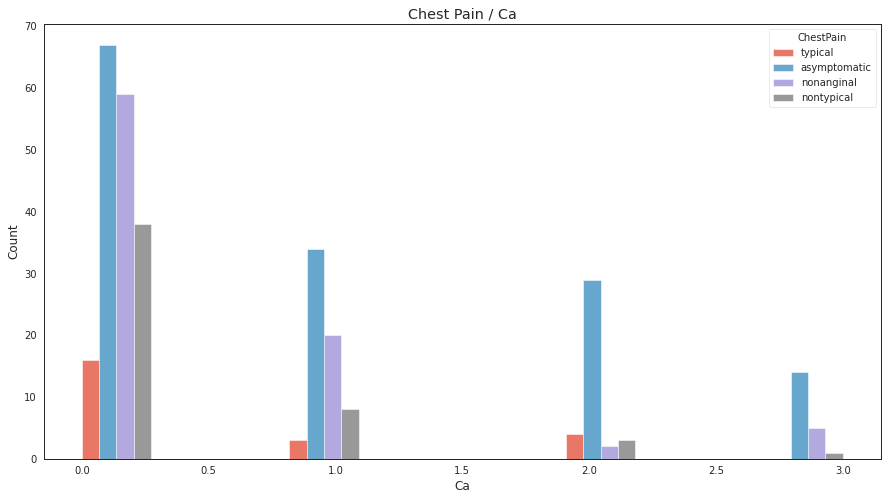

In [ ]:
#Distribution of people with respect to Chest Pain Types and Ca
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Ca", hue="ChestPain", multiple="dodge", shrink=1)
plt.title("Chest Pain / Ca")

Text(0.5, 1.0, 'Chest Pain / Gender')

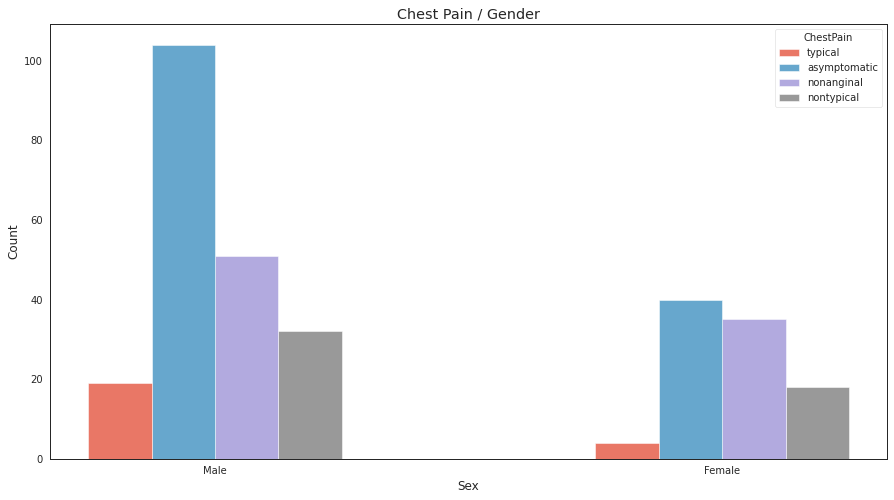

In [ ]:
#Distribution of people with respect to Chest Pain Types and Gender
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Sex", hue="ChestPain", multiple="dodge", shrink=0.5)
plt.title("Chest Pain / Gender")

### **Stroke Prediction Dataset (Additional Dataset)**

Heart disease is the second biggest cause of death worldwide, accounting for over 11% of all deaths, according to the World Health Organization (WHO). Based on input criteria such as gender, age, different illnesses, and smoking status, this dataset is used to predict whether a patient is likely to have a heart disease.
This data set was downloaded from
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
df_extra = pd.read_csv('/content/drive/MyDrive/CS210/HeartDisease_CS210Project/healthcare-dataset-stroke-data.csv')

In [ ]:
df_extra.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**-> Missing Value Treatment with Mean Value**

In [ ]:
df_extra['bmi'] = df_extra['bmi'].fillna(df_extra['bmi'].mean())

In [ ]:
df_extra.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df_extra.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df_extra.shape

(5110, 12)

In [ ]:
df_extra.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df_extra.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
cat_df = df_extra[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
strok=df_extra.loc[df_extra['stroke']==1] 
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ea8f83550>,
      dtype=object)

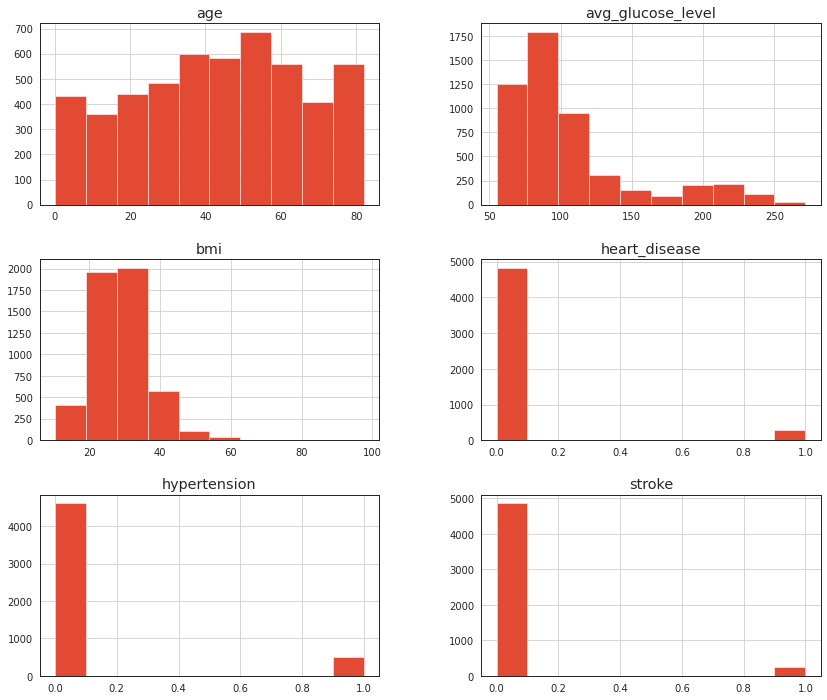

In [ ]:
df_extra.corr()
exclude = ["id"]
df_extra.loc[:, df_extra.columns.difference(exclude)].hist(figsize = (14,12)) 

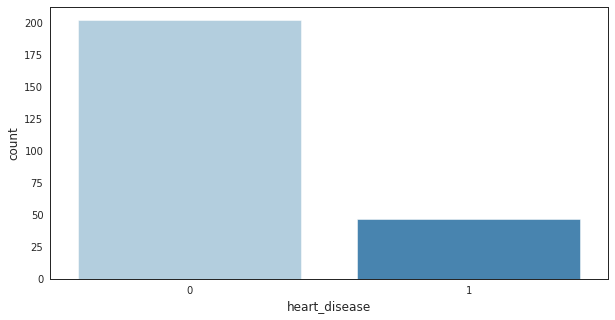

In [ ]:
# Among people who have had a heart attack
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Blues');

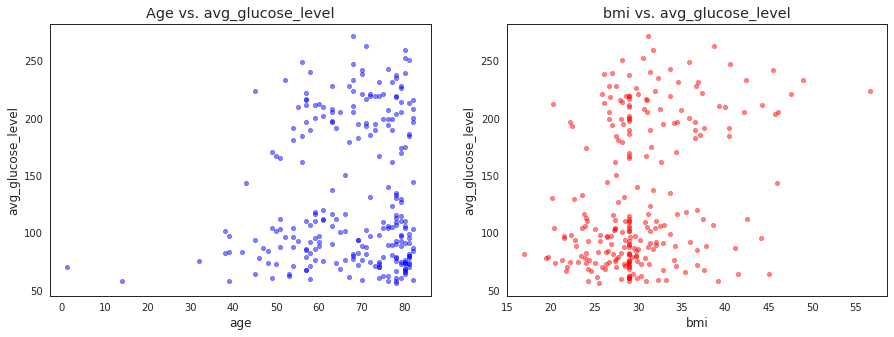

In [ ]:
# Among people who have had a heart attack
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
strok.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='blue', ax=axes[0], title="Age vs. avg_glucose_level")
strok.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

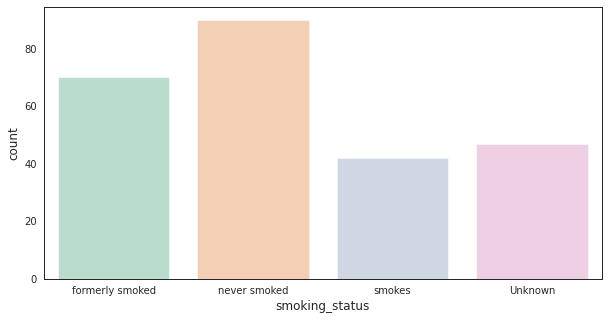

In [ ]:
# Among people who have had a heart attack
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='Pastel2');

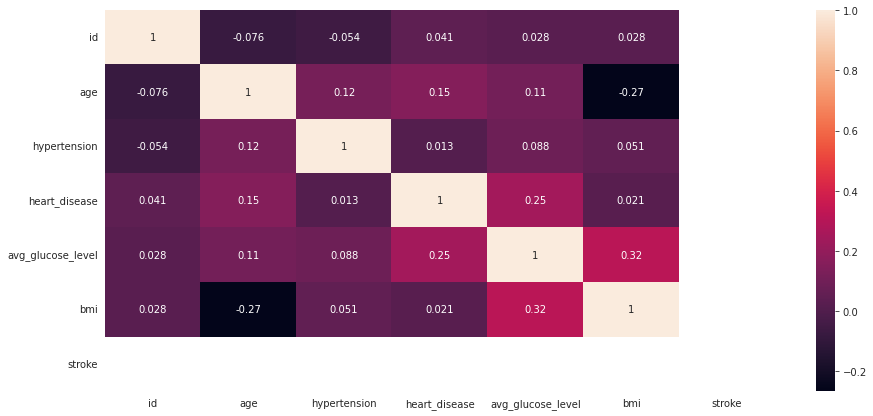

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(strok.corr(),annot=True);

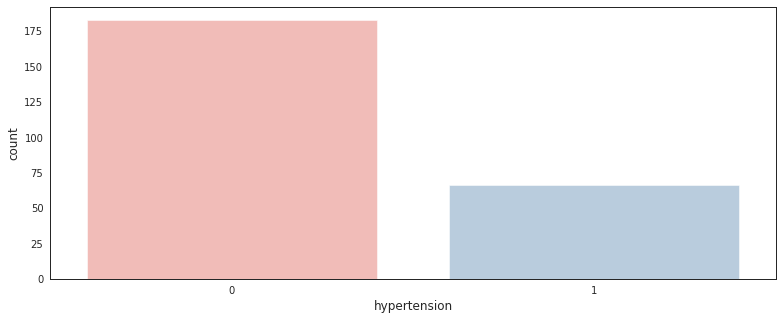

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel1');

#****Future Work****

In the second step of the project, the effects of the factors on heart disease, such as, chest pain, cholesterol and restBP, etc. will be examined and statistical tests will be applied. In addition, the effects of factors such as age and gender on heart disease will be examined and the extent of differences between these two factors will be examined again by statistical tests. In the Machine Learning section, at least two machine learning models will be developed that predict a person's heart disease condition. With these models developed, the person will learn the possibility of heart disease when they enter their information into the system according to statistical results. Hyper-parameter adjustment will also be made on the models to improve the performance of Machine Learning models.

#****Statistical Analysis & Hypothesis Testing****

### Hypothesis Testing
Hypothesis Test: Our group want to test whether there is important differences in terms of people who having Heart Disease due to chest pain and those who do not.
**Null Hypothesis ($H_0$)**: Chest pain is not on affect having heart disease.

$ H_0: \mu_{a_1} = \mu_{a_2}$

**Alternative Hypothesis ($H_A$)**: Chest pain may cause heart disease with its types.

$ H_A:$ Means $\mu_{a_1}  \&  \mu_{a_2}$ are not same.


In [ ]:
df.describe()


,Age,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366
std,9.038662,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [ ]:
df_extra.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
cat_cols = ['gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
con_cols = ["Age","avg_glucose_level","bmi"]
target_col = ["stroke"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
The continuous cols are :  ['Age', 'avg_glucose_level', 'bmi']
The target variable is :   ['stroke']


In [ ]:
#df_extra['bmi'] = pd.cut(x=df_extra['bmi'], bins=[0,18.4,24.9,29.9,100],labels=['Underweight','Healthy','Overweight', 'Obese'])

In [ ]:
label_encoder = preprocessing.LabelEncoder()

label_cols = ["gender", "hypertension","heart_disease", "ever_married" ,"Residence_type","stroke","bmi"]
for col in label_cols:
    df_extra[col]= label_encoder.fit_transform(df_extra[col])

In [ ]:
df_extra_model= pd.get_dummies(df_extra)

x=df_extra_model.drop('stroke', axis=1)
y=df_extra_model['stroke']

In [ ]:

df["HeartDisease"].replace('No', 0 ,inplace=True)
df["HeartDisease"].replace('Yes',1,inplace=True)
df[['HeartDisease']]= df[['HeartDisease']].astype('int64')

df["Thal"].replace('normal', 0 ,inplace=True)
df["Thal"].replace('fixed',1,inplace=True)
df["Thal"].replace('reversable', 2 ,inplace=True)
df["Thal"].astype("category").astype("int64")

df_extra["ever_married"].replace('No', 0 ,inplace=True)
df_extra["ever_married"].replace('Yes',1,inplace=True)
df_extra[['ever_married']]= df_extra[['ever_married']].astype('int64')


df_extra["Residence_type"].replace('Rural', 0 ,inplace=True)
df_extra["Residence_type"].replace('Urban',1,inplace=True)
df_extra[['Residence_type']]= df_extra[['Residence_type']].astype('int64')


df["ChestPainType"].replace('typical', 0 ,inplace=True)
df["ChestPainType"].replace('asymptomatic',1,inplace=True)
df["ChestPainType"].replace('nonanginal', 2 ,inplace=True)
df["ChestPainType"].replace('nontypical', 3 ,inplace=True)
df.replace(to_replace={'typical': 0, 'asymptomatic': 1, 'nonanginal': 2, 'nontypical': 3}, inplace=True)

df[['ChestPainType']]= df[['ChestPainType']].astype('int64')

In [ ]:
heart_disease_ChestPain_N = df[df["HeartDisease"] == 0]["ChestPain"] 
heart_disease_ChestPain_Y = df[df["HeartDisease"] == 1]["ChestPain"]  


In [ ]:
stats.levene(heart_disease_ChestPain_N, heart_disease_ChestPain_Y)

LeveneResult(statistic=27.43128856750722, pvalue=3.0636313050870027e-07)

In [ ]:
print(heart_disease_ChestPain_N.var())
print(heart_disease_ChestPain_Y.var())

0.8497680682328302
0.3981857991867384


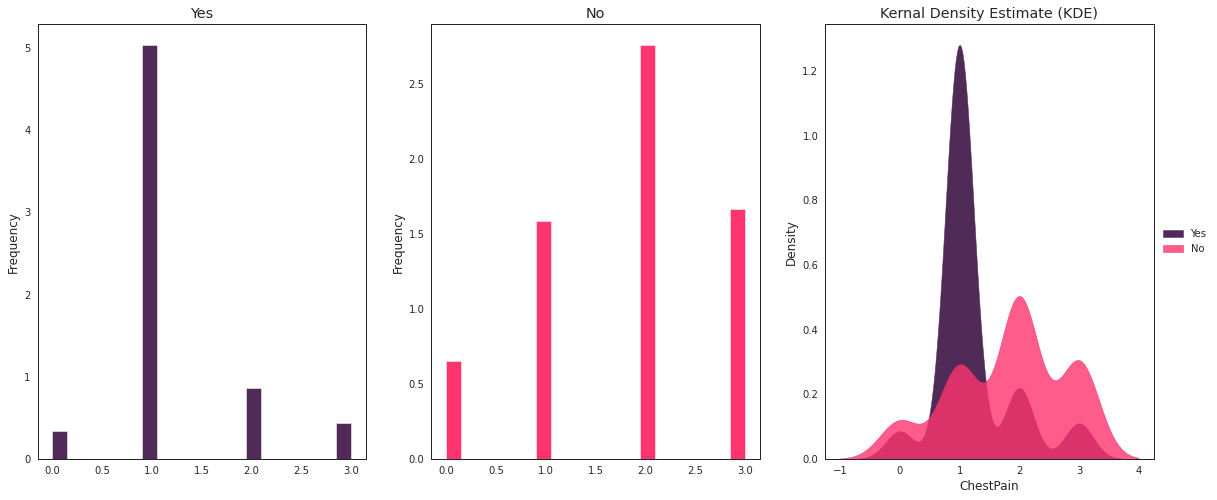

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_ChestPain_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_ChestPain_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_ChestPain_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_ChestPain_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_ChestPain_Y, heart_disease_ChestPain_N, equal_var=True)

Ttest_indResult(statistic=-6.582811491709453, pvalue=2.050329847864531e-10)

In [ ]:
heart_disease_RestBP_Y = df[df["HeartDisease"] == 1]["RestBP"] 
heart_disease_RestBP_N = df[df["HeartDisease"] == 0]["RestBP"]  


In [ ]:
stats.levene(heart_disease_RestBP_Y, heart_disease_RestBP_N)


LeveneResult(statistic=2.0002001425877736, pvalue=0.15831196426971206)

In [ ]:
print(heart_disease_RestBP_Y.var())
print(heart_disease_RestBP_N.var())

352.2760921697427
262.59355828220856


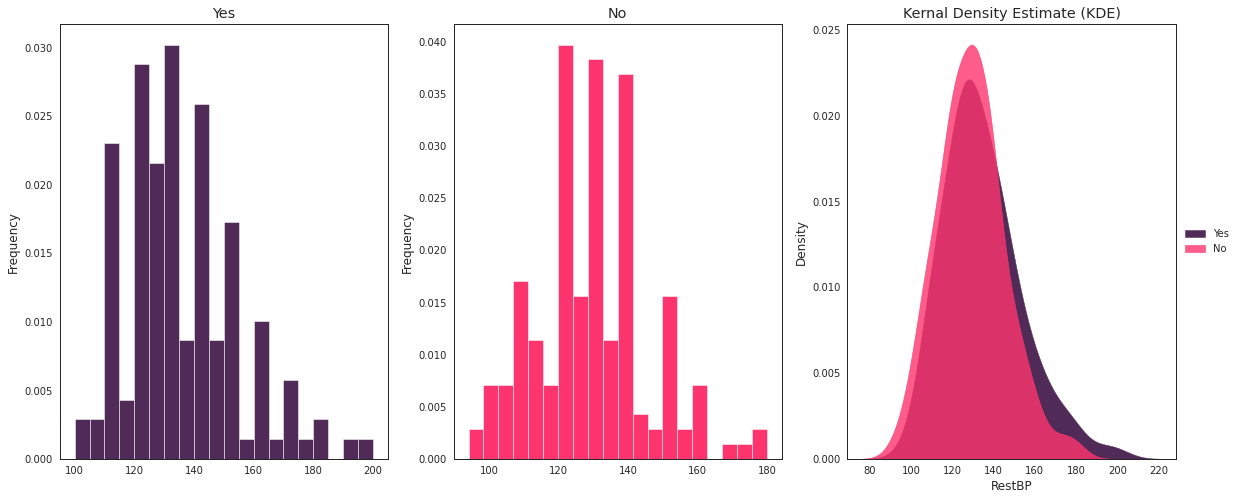

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_RestBP_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_RestBP_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_RestBP_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_RestBP_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_RestBP_Y, heart_disease_RestBP_N, equal_var=True)

Ttest_indResult(statistic=2.647004396805282, pvalue=0.008548268928594928)

In [ ]:
heart_disease_Chol_Y = df[df["HeartDisease"] == 1]["Chol"] 
heart_disease_Chol_N = df[df["HeartDisease"] == 0]["Chol"]  

In [ ]:
stats.levene(heart_disease_Chol_Y, heart_disease_Chol_N)


LeveneResult(statistic=0.14541695203186358, pvalue=0.7032231637527186)

In [ ]:
print(heart_disease_Chol_Y.var())
print(heart_disease_Chol_N.var())

2448.946825148577
2857.6059778542567


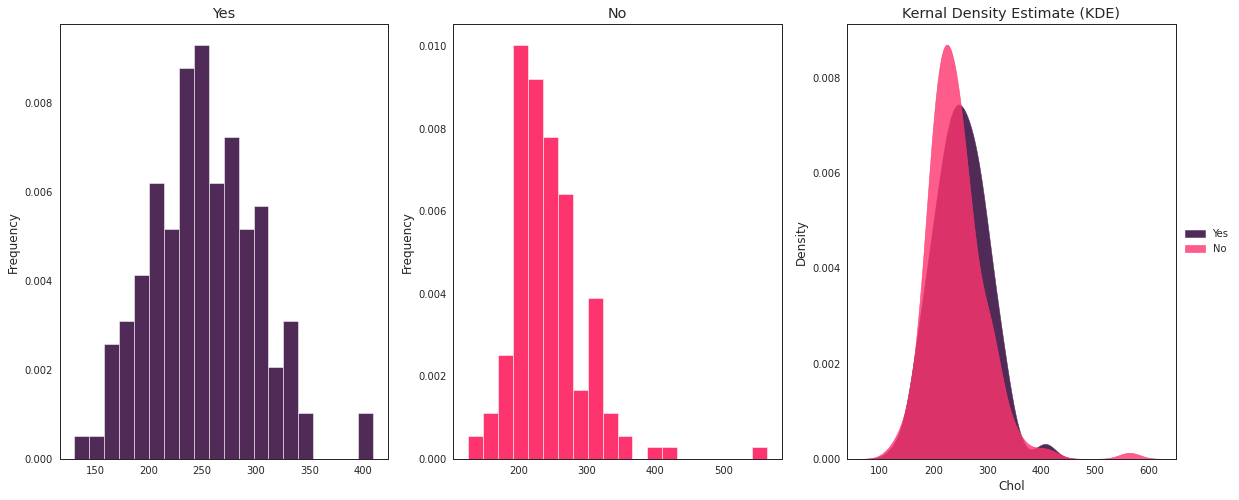

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8)) # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_Chol_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_Chol_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_Chol_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_Chol_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_Chol_Y, heart_disease_Chol_N, equal_var=True)

Ttest_indResult(statistic=1.4829209163941466, pvalue=0.13914167020436527)

In [ ]:
df["Sex"].replace('Female',0,inplace=True)
df["Sex"].replace('Male',1 ,inplace=True)

female = df[df["Sex"] == 0]["HeartDisease"] 
male = df[df["Sex"] == 1]["HeartDisease"]  

In [ ]:
stats.levene(female, male)


LeveneResult(statistic=10.192850194094607, pvalue=0.001559059550358036)

In [ ]:
print(male.var())
print(female.var())

0.2483542505327961
0.19329896907216468


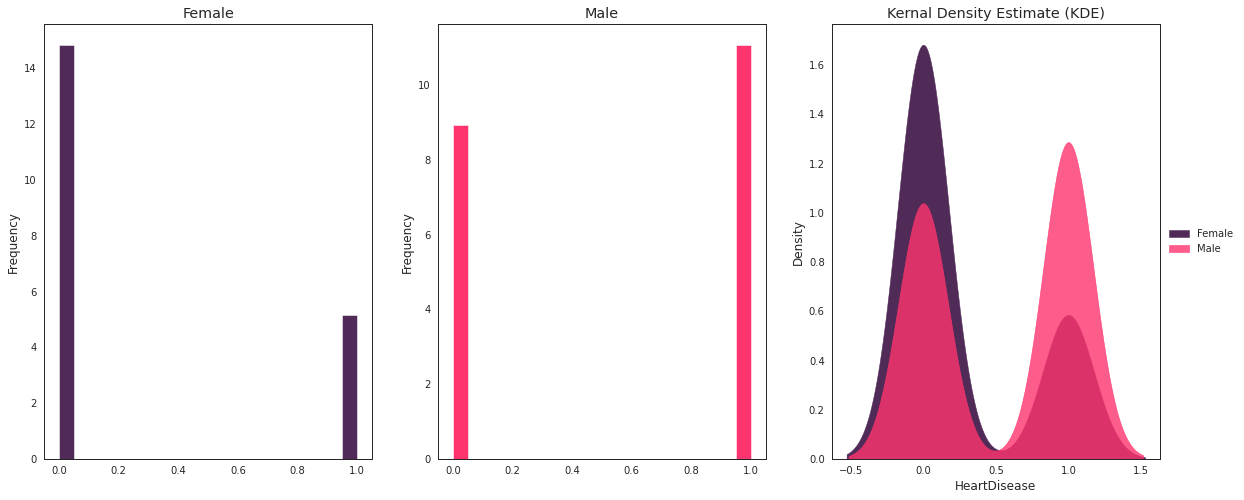

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8)) # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
female.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Female")

male.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("Male")

sns.kdeplot(female, shade=True, label="Female", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(male, shade=True, label="Male", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(female, male, equal_var=True)

Ttest_indResult(statistic=-4.997886755995939, pvalue=9.851911089332815e-07)

In [ ]:
heart_disease_Age_Y = df[df["HeartDisease"] == 1]["Age"] 
heart_disease_Age_N = df[df["HeartDisease"] == 0]["Age"]  

In [ ]:
stats.levene(heart_disease_Age_Y, heart_disease_Age_N)


LeveneResult(statistic=7.935920098993705, pvalue=0.0051667349340750405)

In [ ]:
print(heart_disease_Age_Y.var())
print(heart_disease_Age_N.var())

63.01845480137626
90.47733054017657


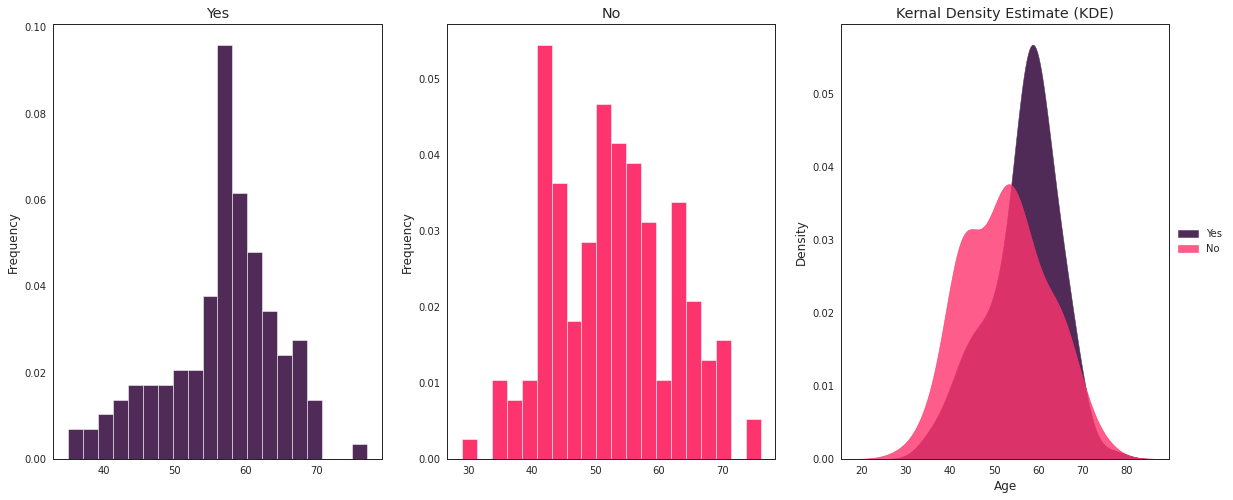

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_Age_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_Age_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_Age_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_Age_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_Age_Y, heart_disease_Age_N, equal_var=True)

Ttest_indResult(statistic=3.971100226293655, pvalue=8.955636917529706e-05)

In [ ]:
heart_disease = df[df["HeartDisease"] == 1]

h_55 = heart_disease[df['Age'] > 55 ]
h_65 = h_55[df['Age'] < 65 ]

female1 = h_65[df["Sex"] == 0]["Age"]
male1 = h_65[df["Sex"] == 1]["Age"]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
stats.levene(male1, female1)

LeveneResult(statistic=0.3422541942915973, pvalue=0.5604672535092787)

In [ ]:
print(male1.var())
print(female1.var())

5.306666666666665
5.988304093567253


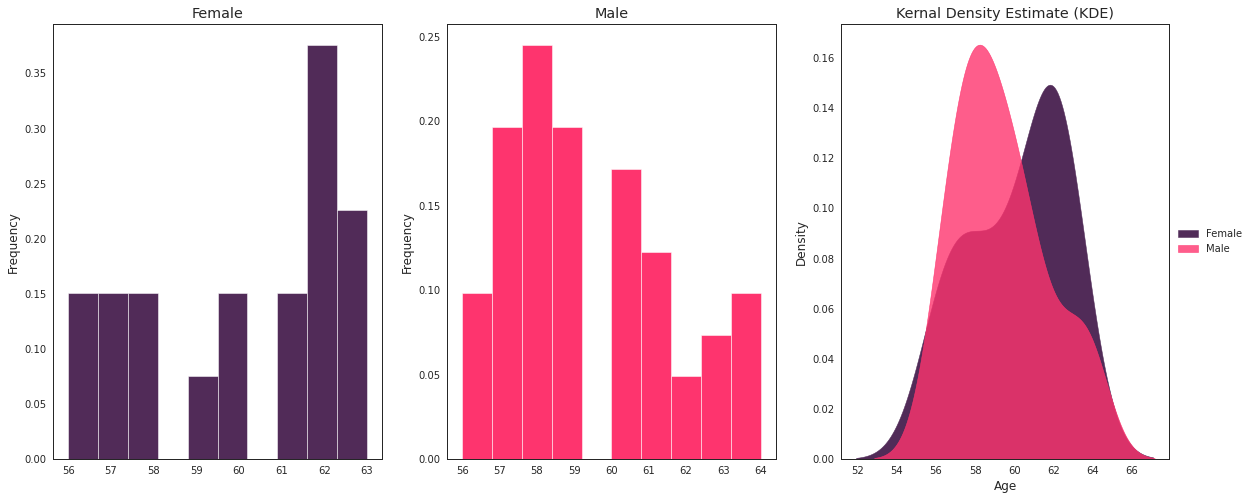

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
female1.plot(kind="hist", ax=ax[0], bins=10, label="completed", color="#512b58", density=True)
ax[0].set_title("Female")

male1.plot(kind="hist", ax=ax[1], bins=10, label="none", color="#fe346e", density=True)
ax[1].set_title("Male")

sns.kdeplot(female1, shade=True, label="Female", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(male1, shade=True, label="Male", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(female1, male1, equal_var=True)

Ttest_indResult(statistic=1.2260812407416906, pvalue=0.2243971726419007)

In [ ]:
heart_disease = df[df["HeartDisease"] == 1]

h_40 = heart_disease[df['Age'] > 40 ]
h_54 = h_40[df['Age'] < 55 ]

female2 = h_54[df["Sex"] == 0]["Age"]
male2 = h_54[df["Sex"] == 1]["Age"]




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
stats.levene(male2, female2)

LeveneResult(statistic=0.16728307254623054, pvalue=0.6849609247380444)

In [ ]:
print(male2.var())
print(female2.var())

15.907142857142857
32.0


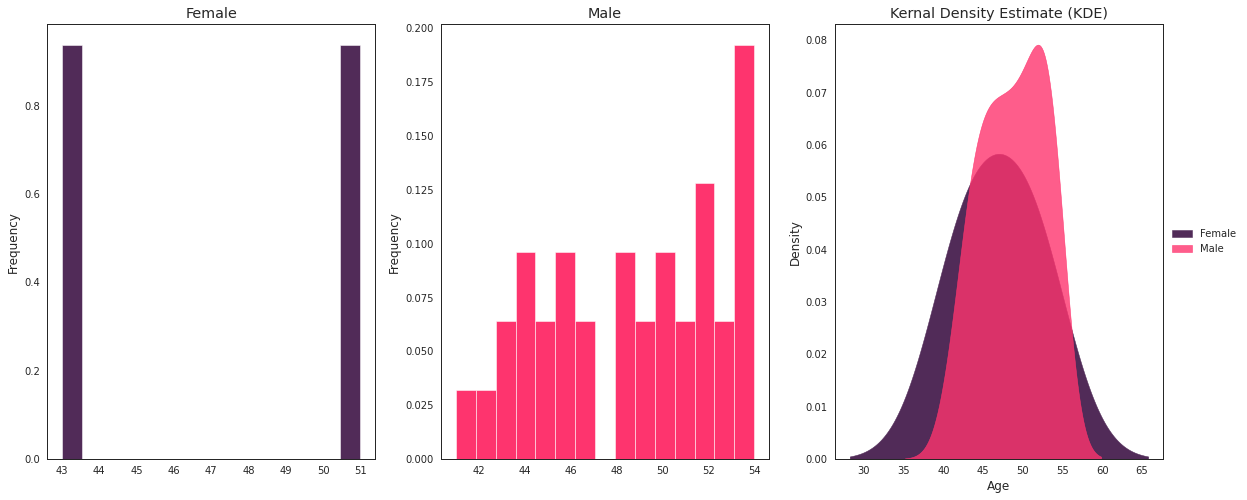

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
female2.plot(kind="hist", ax=ax[0], bins=15, label="completed", color="#512b58", density=True)
ax[0].set_title("Female")

male2.plot(kind="hist", ax=ax[1], bins=15, label="none", color="#fe346e", density=True)
ax[1].set_title("Male")

sns.kdeplot(female2, shade=True, label="Female", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(male2, shade=True, label="Male", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(female2, male2, equal_var=True)

Ttest_indResult(statistic=-0.5956597966644944, pvalue=0.5551291564783377)

In [ ]:
heart_disease = df[df["HeartDisease"] == 1]

h_66 = heart_disease[df['Age'] > 60 ]
h_80 = h_66[df['Age'] < 80 ]

female3 = h_80[df["Sex"] == 0]["Age"]
male3 = h_80[df["Sex"] == 1]["Age"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
stats.levene(male3, female3)

LeveneResult(statistic=6.206340677055347, pvalue=0.01676532772616233)

In [ ]:
print(male3.var())
print(female3.var())

12.450604838709678
2.2424242424242427


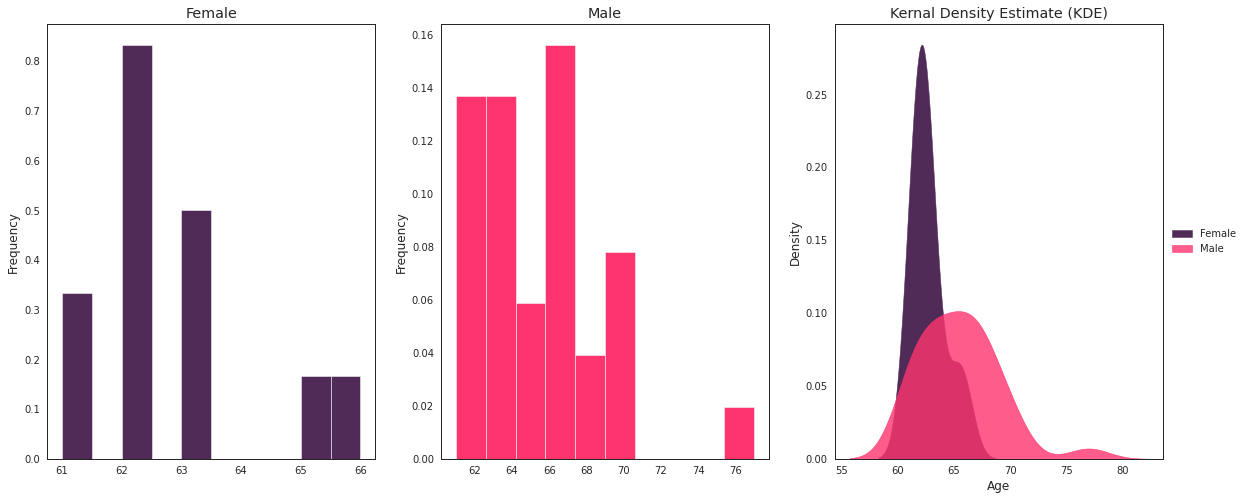

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
female3.plot(kind="hist", ax=ax[0], bins=10, label="completed", color="#512b58", density=True)
ax[0].set_title("Female")

male3.plot(kind="hist", ax=ax[1], bins=10, label="none", color="#fe346e", density=True)
ax[1].set_title("Male")

sns.kdeplot(female3, shade=True, label="Female", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(male3, shade=True, label="Male", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")


plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(female3, male3, equal_var=True)

Ttest_indResult(statistic=-2.6473829294544675, pvalue=0.011373384873695741)

In [ ]:
heart_disease_FbsY = df[df["HeartDisease"] == 1]["Fbs"] 
heart_disease_FbsN = df[df["HeartDisease"] == 0]["Fbs"]  

In [ ]:
stats.levene(heart_disease_FbsY, heart_disease_FbsN)

LeveneResult(statistic=0.1922368092822419, pvalue=0.6613759374817134)

In [ ]:
print(heart_disease_FbsY.var())
print(heart_disease_FbsN.var())

0.13418830153268713
0.12131527756995346


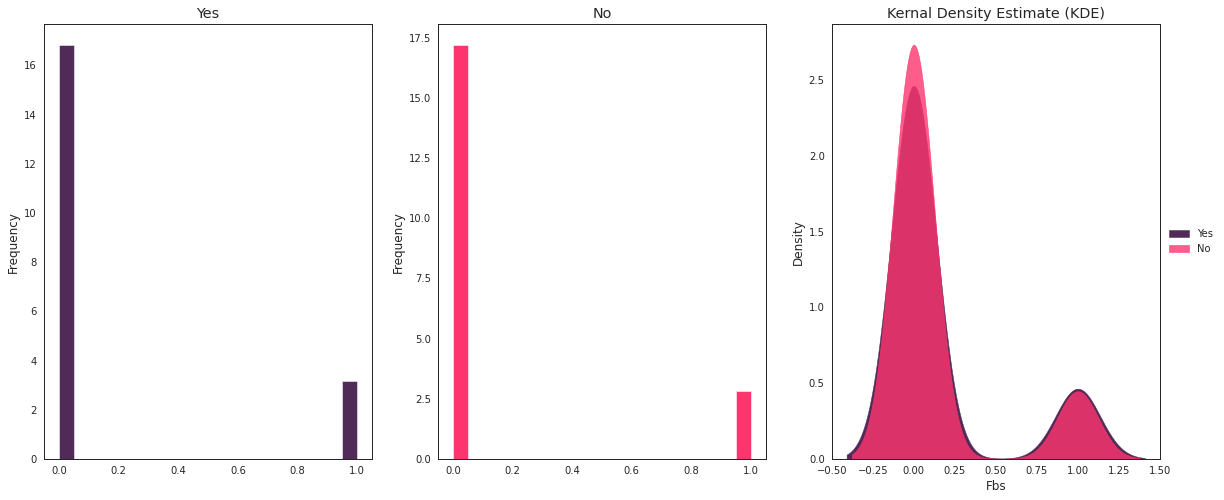

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_FbsY.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_FbsN.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_FbsY, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_FbsN, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")


plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_FbsY, heart_disease_FbsN, equal_var=True)

Ttest_indResult(statistic=0.438448183121155, pvalue=0.6613759374817116)

In [ ]:
heart_disease_RestECG_Y = df[df["HeartDisease"] == 1]["RestECG"] 
heart_disease_RestECG_N = df[df["HeartDisease"] == 0]["RestECG"]  

In [ ]:
stats.levene(heart_disease_RestECG_Y, heart_disease_RestECG_N)

LeveneResult(statistic=0.0050252115144777945, pvalue=0.9435333914016314)

In [ ]:
print(heart_disease_RestECG_Y.var())
print(heart_disease_RestECG_N.var())

0.9554790949848818
0.9727293131827002


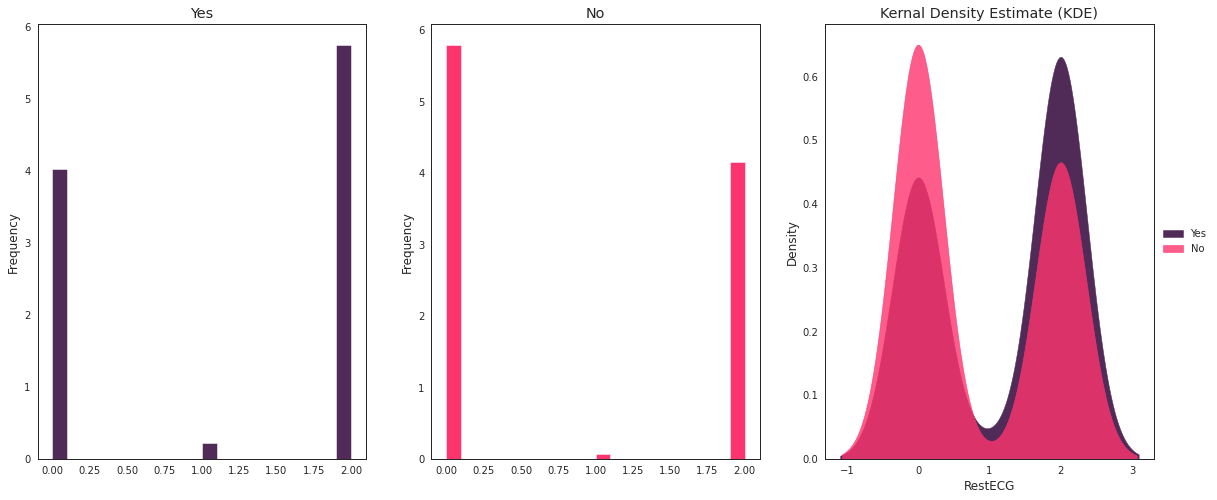

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_RestECG_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_RestECG_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_RestECG_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_RestECG_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_RestECG_Y, heart_disease_RestECG_N, equal_var=True)

Ttest_indResult(statistic=2.9784886142867975, pvalue=0.0031324013864187303)

In [ ]:
heart_disease_MaxHR_Y = df[df["HeartDisease"] == 1]["MaxHR"] 
heart_disease_MaxHR_N = df[df["HeartDisease"] == 0]["MaxHR"]  

In [ ]:
stats.levene(heart_disease_MaxHR_Y, heart_disease_MaxHR_N)

LeveneResult(statistic=5.222170237138975, pvalue=0.022996018094294857)

In [ ]:
print(heart_disease_MaxHR_Y.var())
print(heart_disease_MaxHR_N.var())

510.45417578980306
368.6046685620229


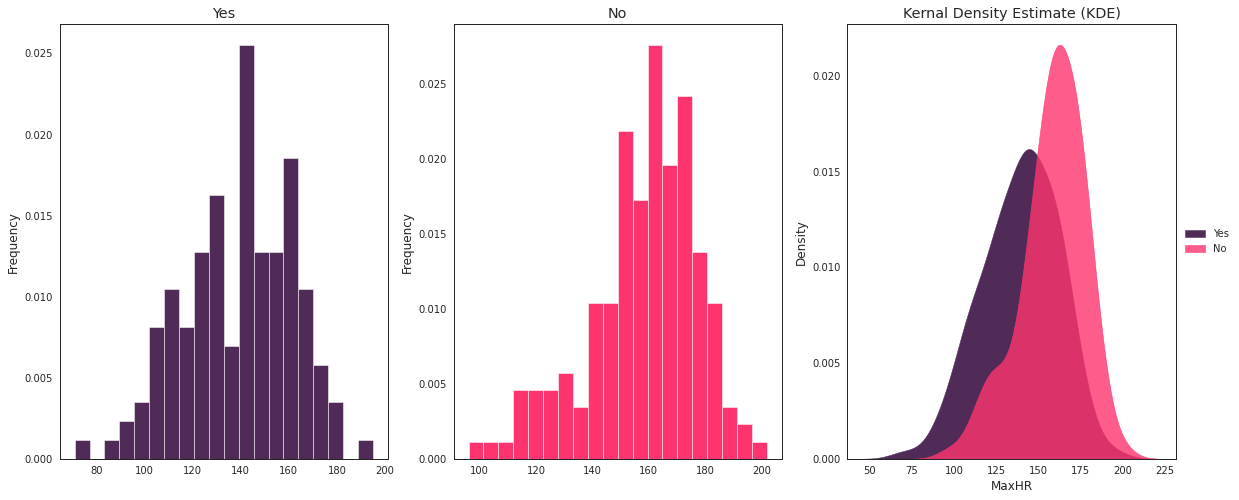

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_MaxHR_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_MaxHR_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_MaxHR_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_MaxHR_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_MaxHR_Y, heart_disease_MaxHR_N, equal_var=True)

Ttest_indResult(statistic=-7.9636186823270485, pvalue=3.456964908430172e-14)

In [ ]:
heart_disease_ExAng_Y = df[df["HeartDisease"] == 1]["ExAng"] 
heart_disease_ExAng_N = df[df["HeartDisease"] == 0]["ExAng"]  

In [ ]:
stats.levene(heart_disease_ExAng_Y, heart_disease_ExAng_N)

LeveneResult(statistic=40.915719151083245, pvalue=6.064217011665629e-10)

In [ ]:
print(heart_disease_ExAng_Y.var())
print(heart_disease_ExAng_N.var())

0.24960900844541709
0.12131527756995347


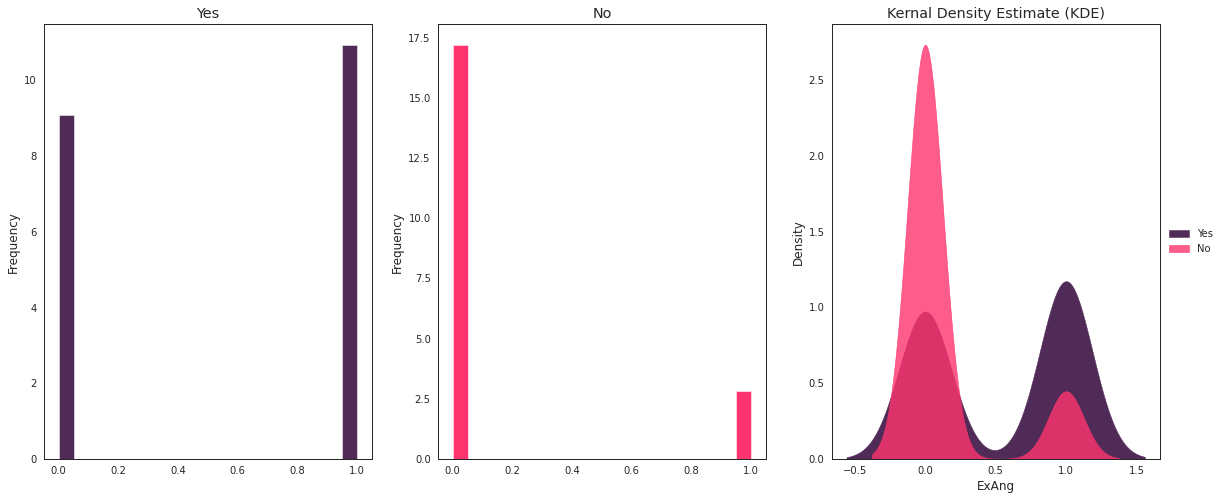

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_ExAng_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_ExAng_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_ExAng_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_ExAng_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_ExAng_Y, heart_disease_ExAng_N, equal_var=True)

Ttest_indResult(statistic=8.30788124570894, pvalue=3.365774372106871e-15)

In [ ]:
heart_disease_Oldpeak_Y = df[df["HeartDisease"] == 1]["Oldpeak"] 
heart_disease_Oldpeak_N = df[df["HeartDisease"] == 0]["Oldpeak"]  

In [ ]:
stats.levene(heart_disease_Oldpeak_Y, heart_disease_Oldpeak_N)

LeveneResult(statistic=32.99961913559087, pvalue=2.255209968749643e-08)

In [ ]:
print(heart_disease_Oldpeak_Y.var())
print(heart_disease_Oldpeak_N.var())

1.6967156709415092
0.6111072871464925


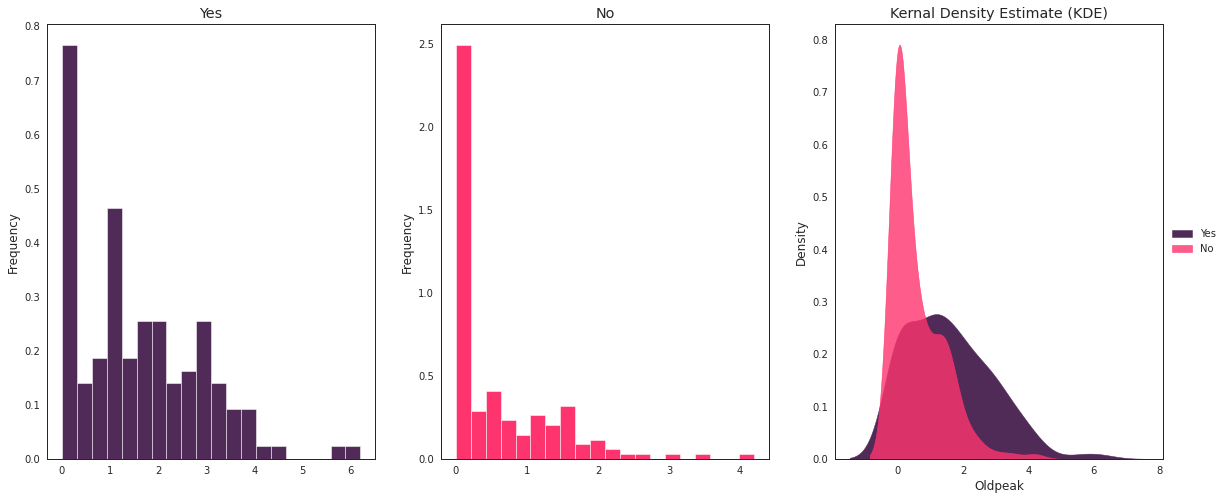

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_Oldpeak_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_Oldpeak_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_Oldpeak_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_Oldpeak_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_Oldpeak_Y, heart_disease_Oldpeak_N, equal_var=True)

Ttest_indResult(statistic=8.134292027638805, pvalue=1.0976053396984802e-14)

In [ ]:
heart_disease_Slope_Y = df[df["HeartDisease"] == 1]["Slope"] 
heart_disease_Slope_N = df[df["HeartDisease"] == 0]["Slope"]  

In [ ]:
stats.levene(heart_disease_Slope_Y, heart_disease_Slope_N)

LeveneResult(statistic=1.0161247259466561, pvalue=0.3142496436433277)

In [ ]:
print(heart_disease_Slope_Y.var())
print(heart_disease_Slope_N.var())

0.3177979355645916
0.35354631153673505


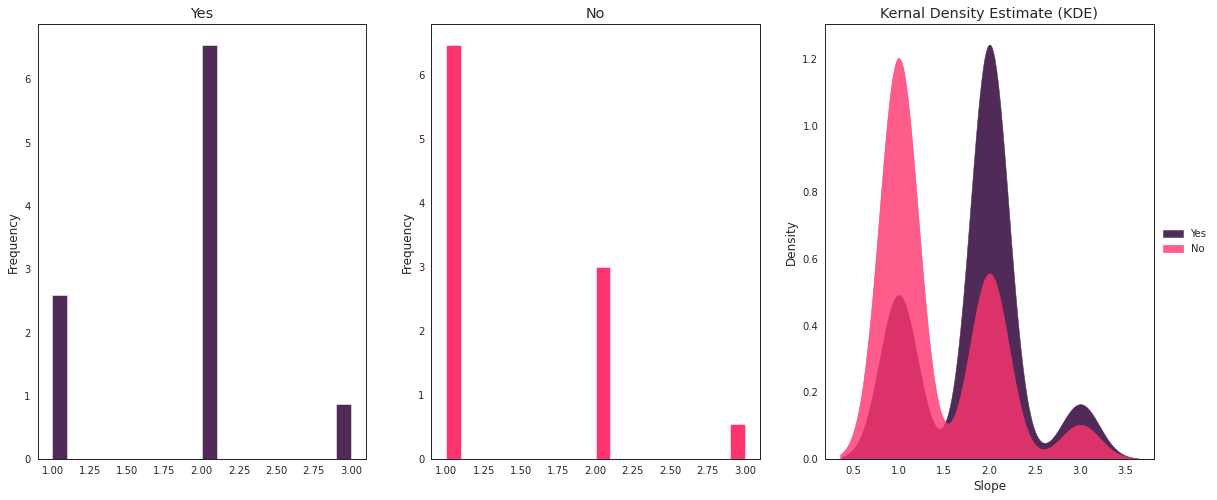

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_Slope_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_Slope_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_Slope_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_Slope_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_Slope_Y, heart_disease_Slope_N, equal_var=True)

Ttest_indResult(statistic=6.256052620342101, pvalue=1.3537567141914426e-09)

In [ ]:
heart_disease_Ca_Y = df[df["HeartDisease"] == 1]["Ca"] 
heart_disease_Ca_N = df[df["HeartDisease"] == 0]["Ca"]  

In [ ]:
stats.levene(heart_disease_Ca_Y, heart_disease_Ca_N)

LeveneResult(statistic=54.535219891697665, pvalue=1.5074365834859863e-12)

In [ ]:
print(heart_disease_Ca_Y.var())
print(heart_disease_Ca_N.var())

1.0410801793347935
0.3938351039952124


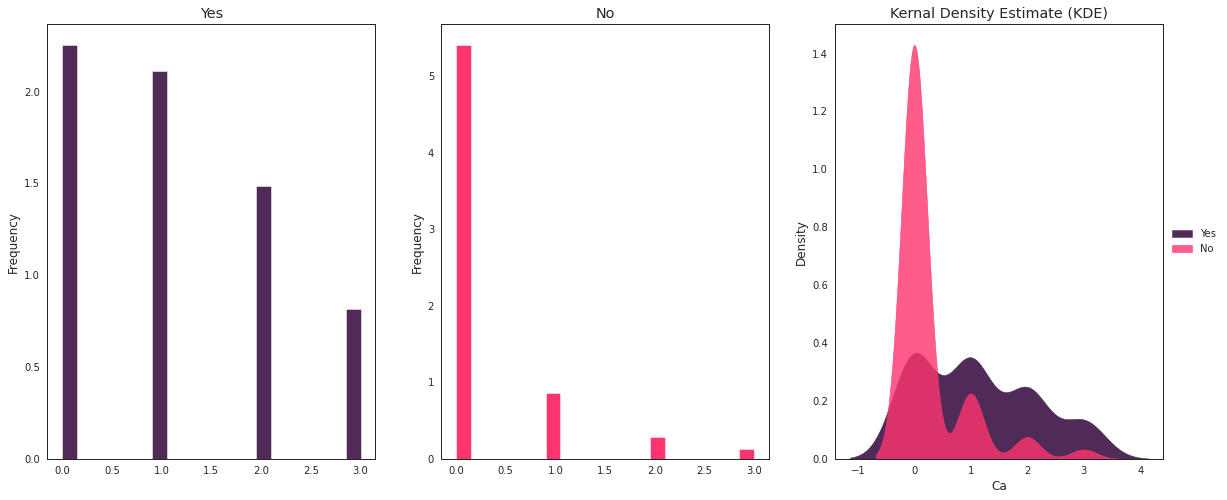

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_Ca_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_Ca_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_Ca_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_Ca_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_Ca_Y, heart_disease_Ca_N, equal_var=True)

Ttest_indResult(statistic=8.988915949316496, pvalue=2.832488294069068e-17)

In [ ]:
heart_disease_Thal_Y = df[df["HeartDisease"] == 1]["Thal"] 
heart_disease_Thal_N = df[df["HeartDisease"] == 0]["Thal"]  

In [ ]:
stats.levene(heart_disease_Thal_Y, heart_disease_Thal_N)

LeveneResult(statistic=7.261777661241968, pvalue=0.007439447496039156)

In [ ]:
print(heart_disease_Thal_Y.var())
print(heart_disease_Thal_N.var())

0.7846939839432795
0.5801286847224311


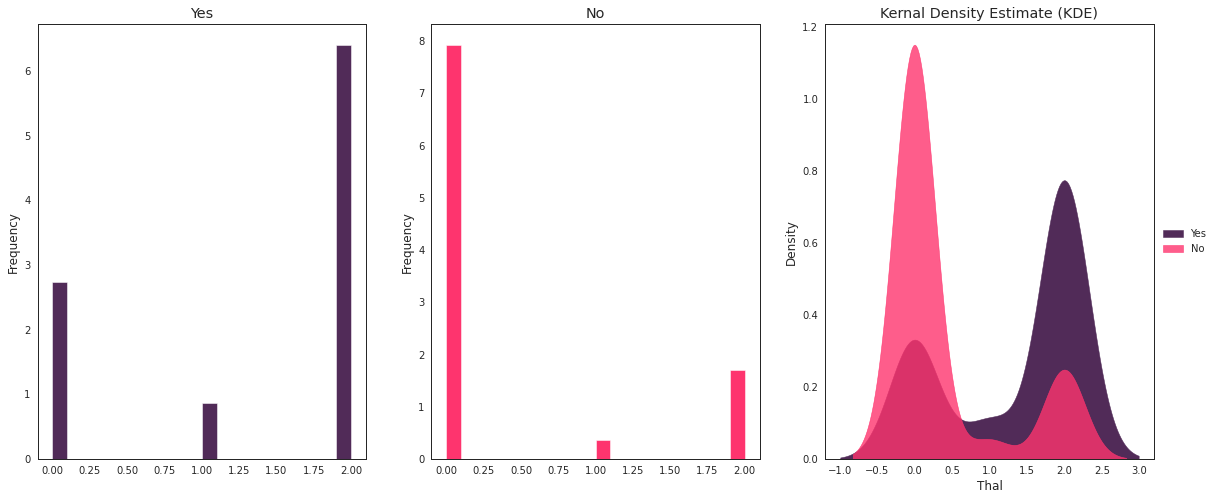

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_Thal_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_Thal_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_Thal_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_Thal_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_Thal_Y, heart_disease_Thal_N, equal_var=True)

Ttest_indResult(statistic=10.448137800013154, pvalue=5.249081947405286e-22)

In [ ]:
heart_disease_hypertansion_Y = df_extra[df_extra["heart_disease"] == 1]["hypertension"] 
heart_disease_hypertansion_N = df_extra[df_extra["heart_disease"] == 0]["hypertension"]  

In [ ]:
stats.levene(heart_disease_hypertansion_Y, heart_disease_hypertansion_N)

LeveneResult(statistic=60.6290849290175, pvalue=8.285820771788087e-15)

In [ ]:
print(heart_disease_hypertansion_Y.var())
print(heart_disease_hypertansion_N.var())

0.17876152832674583
0.08173705101657991


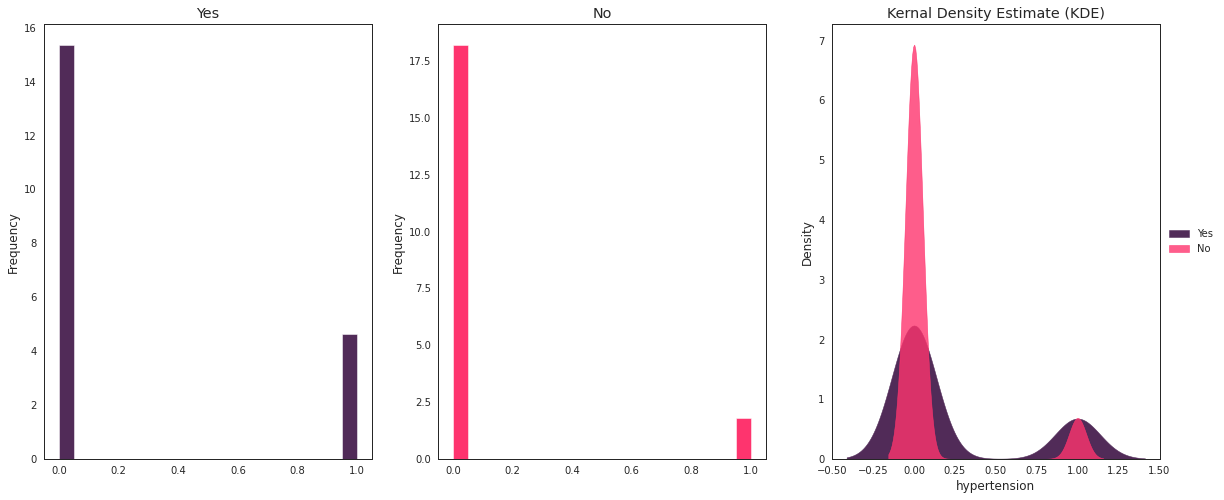

In [ ]:


fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_hypertansion_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_hypertansion_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_hypertansion_Y, shade=True, label="Yes",  alpha = 1,ax=ax[2], color="#512b58")
sns.kdeplot(heart_disease_hypertansion_N, shade=True, label="No", alpha = 0.8,  ax=ax[2], color="#fe346e")



ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_hypertansion_Y, heart_disease_hypertansion_N, equal_var=True)

Ttest_indResult(statistic=7.786468065112545, pvalue=8.285820771773292e-15)

In [ ]:
heart_disease_bmi_Y = df_extra[df_extra["heart_disease"] == 1]["bmi"] 
heart_disease_bmi_N = df_extra[df_extra["heart_disease"] == 0]["bmi"]  

In [ ]:
stats.levene(heart_disease_bmi_Y, heart_disease_bmi_N)

LeveneResult(statistic=51.728735659515394, pvalue=7.29396138536913e-13)

In [ ]:
print(heart_disease_bmi_Y.var())
print(heart_disease_bmi_N.var())

2464.413122529645
5638.195024706461


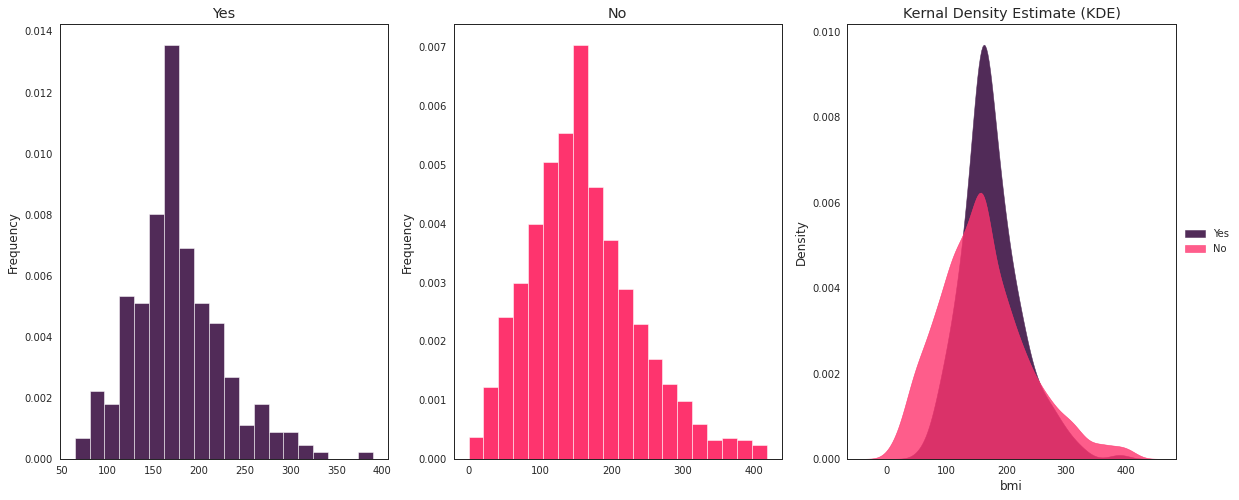

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_bmi_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_bmi_N.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_bmi_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_bmi_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_bmi_Y, heart_disease_bmi_N, equal_var=True)

Ttest_indResult(statistic=3.070097981285008, pvalue=0.0021511259578048886)

In [ ]:
heart_disease_glucose_Y = df_extra[df_extra["heart_disease"] == 1]["avg_glucose_level"] 
heart_disease_glucose_N = df_extra[df_extra["heart_disease"] == 0]["avg_glucose_level"]  

In [ ]:
stats.levene(heart_disease_glucose_Y, heart_disease_glucose_N)

LeveneResult(statistic=129.4732275957407, pvalue=1.2123416843989748e-29)

In [ ]:
print(heart_disease_glucose_Y.var())
print(heart_disease_glucose_N.var())

3946.742250113304
1886.3446610937947


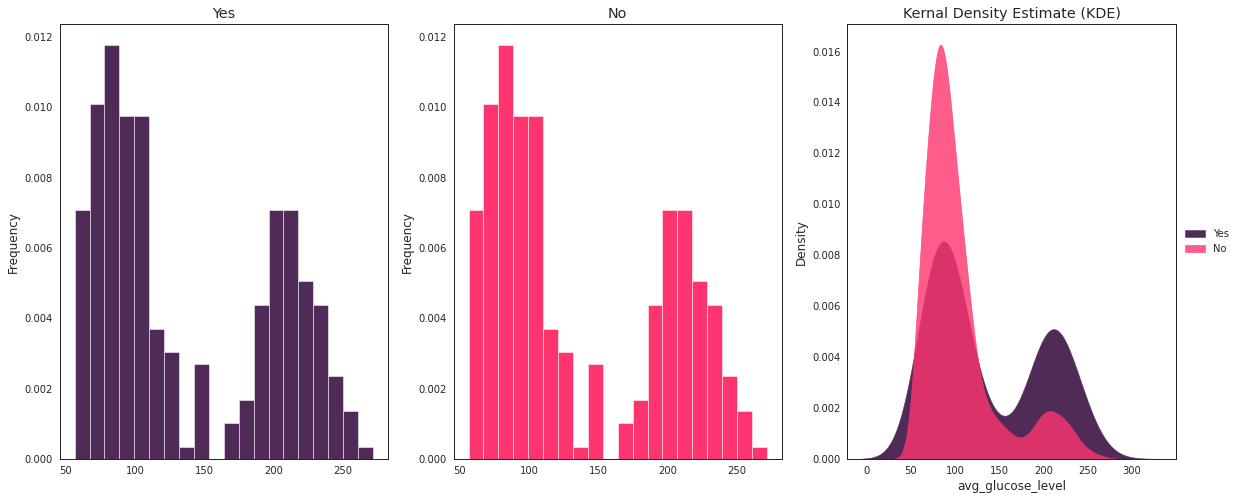

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
heart_disease_glucose_Y.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="#512b58", density=True)
ax[0].set_title("Yes")

heart_disease_glucose_Y.plot(kind="hist", ax=ax[1], bins=20, label="none", color="#fe346e", density=True)
ax[1].set_title("No")

sns.kdeplot(heart_disease_glucose_Y, shade=True, label="Yes", ax=ax[2], alpha = 1, color="#512b58")
sns.kdeplot(heart_disease_glucose_N, shade=True, label="No", ax=ax[2], alpha = 0.8, color="#fe346e")
ax[2].set_title("Kernal Density Estimate (KDE)")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.show()

In [ ]:
ttest_ind(heart_disease_glucose_Y, heart_disease_glucose_N, equal_var=True)

Ttest_indResult(statistic=11.722559501254661, pvalue=2.453922432786899e-31)

#****Machine Learning****


Firstly, our group categorize the variances that causes to heart disease such as, gender, chest pain, smoking status etc. 

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val_extra = []
continous_val_extra = []
for column in df_extra.columns:
    if len(df_extra[column].unique()) <= 10:
        categorical_val_extra.append(column)
    else:
        continous_val_extra.append(column)

In [ ]:
categorical_val


['Sex',
 'ChestPain',
 'Fbs',
 'RestECG',
 'ExAng',
 'Slope',
 'Ca',
 'Thal',
 'AHD',
 'HeartDisease',
 'ChestPainType',
 'ExerciseAngina']

In [ ]:
categorical_val_extra

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [ ]:
categorical_val.remove('HeartDisease')
dataset = pd.get_dummies(df, columns = categorical_val)

In [ ]:
categorical_val_extra.remove('heart_disease')
dataset_extra = pd.get_dummies(df_extra, columns = categorical_val_extra)

In [ ]:
dataset.head()

,Age,RestBP,Chol,MaxHR,Oldpeak,HeartDisease,Sex_0,Sex_1,ChestPain_0,ChestPain_1,...,Thal_1,Thal_2,AHD_No,AHD_Yes,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,ExerciseAngina_0,ExerciseAngina_1
1,63,145,233,150,2.3,0,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0
2,67,160,286,108,1.5,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
3,67,120,229,129,2.6,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,37,130,250,187,3.5,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
5,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
dataset_extra.head()

,id,age,heart_disease,avg_glucose_level,bmi,gender_0,gender_1,gender_2,hypertension_0,hypertension_1,...,work_type_Self-employed,work_type_children,Residence_type_0,Residence_type_1,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_0,stroke_1
0,9046,67.0,1,228.69,240,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,51676,61.0,0,202.21,162,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
2,31112,80.0,1,105.92,199,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,60182,49.0,0,171.23,218,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,1665,79.0,0,174.12,113,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
dataset.head()

,Age,RestBP,Chol,MaxHR,Oldpeak,HeartDisease,Sex_0,Sex_1,ChestPain_0,ChestPain_1,...,Thal_1,Thal_2,AHD_No,AHD_Yes,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,ExerciseAngina_0,ExerciseAngina_1
1,0.948726,0.757525,-0.264900,0.017197,1.087338,0,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0
2,1.392002,1.611220,0.760415,-1.821905,0.397182,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
3,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
5,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
s_sc_extra = StandardScaler()
col_to_scale_extra = ['age', 'avg_glucose_level', 'bmi']
dataset_extra[col_to_scale_extra] = s_sc_extra.fit_transform(dataset_extra[col_to_scale_extra])

In [ ]:
dataset_extra.head()

,id,age,heart_disease,avg_glucose_level,bmi,gender_0,gender_1,gender_2,hypertension_0,hypertension_1,...,work_type_Self-employed,work_type_children,Residence_type_0,Residence_type_1,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_0,stroke_1
0,9046,1.051434,1,2.706375,1.060101,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,51676,0.786070,0,2.121559,0.005977,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
2,31112,1.626390,1,-0.005028,0.506010,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,60182,0.255342,0,1.437358,0.762784,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,1665,1.582163,0,1.501184,-0.656229,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1


In [ ]:
df["AHD"].replace('No', 0 ,inplace=True)
df["AHD"].replace('Yes',1,inplace=True)
df[['AHD']]= df[['AHD']].astype('int64')



In [ ]:
# We provided this function from https://www.kaggle.com/code/faressayah/predicting-heart-disease-using-machine-learning/notebook

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
df.dtypes

Age                  int64
Sex                  int64
ChestPain            int64
RestBP               int64
Chol                 int64
Fbs                  int64
RestECG              int64
MaxHR                int64
ExAng                int64
Oldpeak            float64
Slope                int64
Ca                 float64
Thal                 int64
AHD                  int64
HeartDisease         int64
ChestPainType        int64
ExerciseAngina    category
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

#Prediction of heart disease given values of age, sex, chest pain and RestBP

df['AHD'] = np.where(df["Age"] >= 50, True, False)
df['AHD'] = np.where(df["Sex"] == 1, True, False)
df['AHD'] = np.where(df["RestBP"] >= 145, True, False)
df['AHD'] = np.where(df["ChestPain"] == 1, True, False)

#df_extra["heart_disease"] = np.where(df_extra["bmi"] >= 28, True, False)


X = df.drop(columns=['Chol','Fbs','RestECG','MaxHR','ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'ChestPainType', 'ExerciseAngina', 'HeartDisease','AHD'], axis=1)
y = df['AHD']


# New features using additional datasets as mentioned in the project document 
#I didn't want to create it as an extra models so if you want to see machine learning models, then please make previous ones comment and activate the below ones.

#X = df_extra.drop(columns=['id','gender', 'age', 'ever_married', 'work_type','Residence_type', 'smoking_status' ,'heart_disease'], axis=1)
#y = df_extra['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


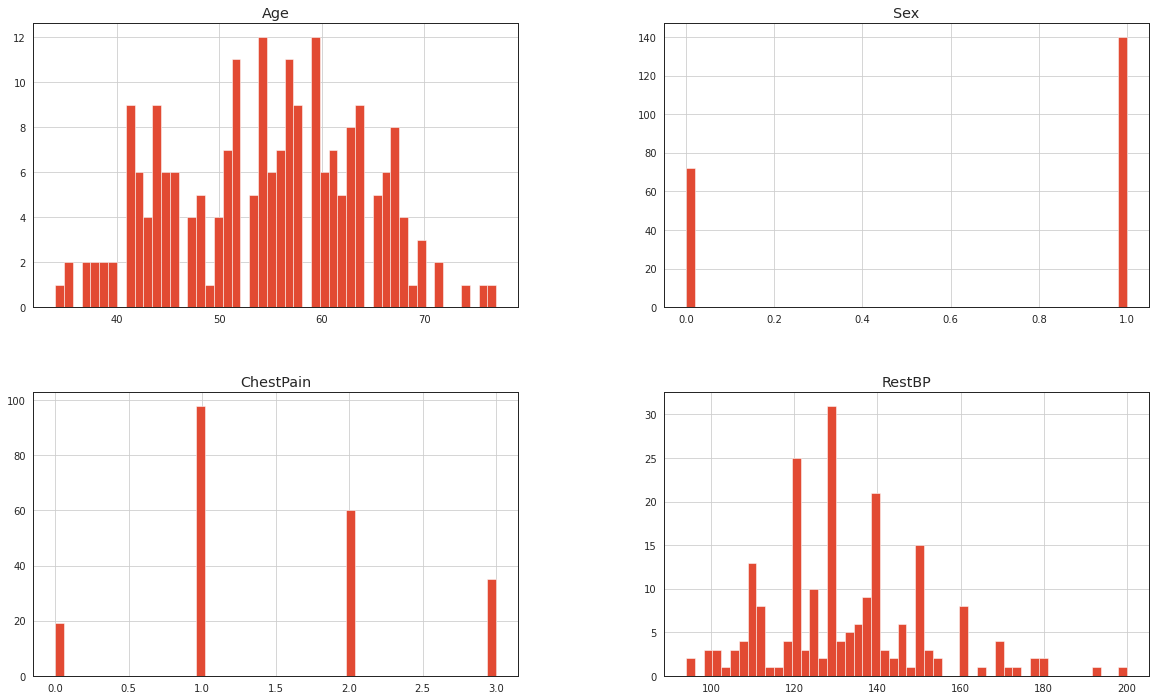

In [ ]:
X_train.hist(figsize=(20,12),bins=50)
plt.show()

## **Logistic Reggression**

#### Initial testing

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


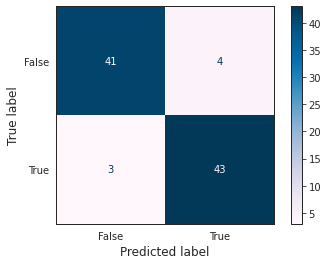

In [ ]:

X_train_predict=lr_clf.predict(X_train)
X_test_predict=lr_clf.predict(X_test)
confusion_matrix(X_test_predict,y_test)


plot_confusion_matrix(lr_clf, X_test, y_test, cmap=plt.cm.PuBu)  
plt.grid(False)
plt.show()

The precision score was measured and it is around 45%.

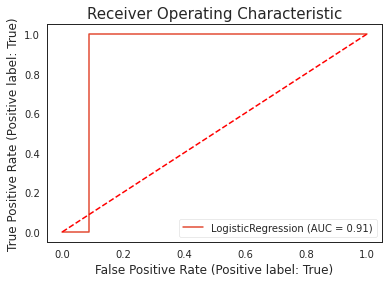

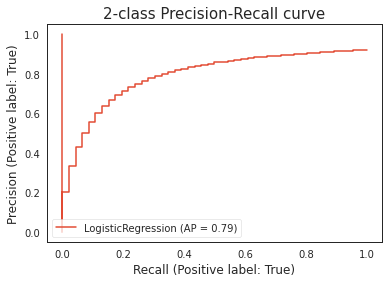

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import auc, precision_recall_curve
from sklearn import metrics 
from sklearn.datasets import make_classification

#printing the precision 
lf_predictions = lr_clf.predict(X_test)
lf_acc = accuracy_score(y_test, lf_predictions)


#Receiver Operating Characteristic
RocCurveDisplay.from_estimator(lr_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("Receiver Operating Characteristic", fontsize=15)
plt.show()

#2-Class Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(lr_clf, X_test, y_test)
plt.title("2-class Precision-Recall curve", fontsize=15)
plt.show()

### Feature Importance

Feature: 0, Score: 0.04089
Feature: 1, Score: 0.13356
Feature: 2, Score: -1.60401
Feature: 3, Score: -0.00706


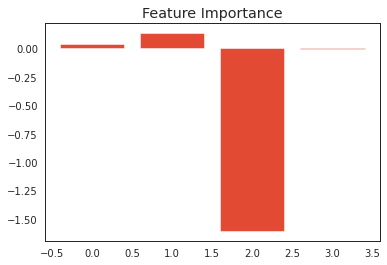

In [ ]:

importance = lr_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.show()

### Accuracy Testing

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.62%
_______________________________________________
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.969388   0.833333  0.896226    0.901361      0.906495
recall       0.833333   0.969388  0.896226    0.901361      0.896226
f1-score     0.896226   0.896226  0.896226    0.896226      0.896226
support    114.000000  98.000000  0.896226  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[95 19]
 [ 3 95]]

Test Result:
Accuracy Score: 92.31%
_______________________________________________
CLASSIFICATION REPORT:
               False       True  accuracy  macro avg  weighted avg
precision   0.931818   0.914894  0.923077   0.923356      0.923263
recall      0.911111   0.934783  0.923077   0.922947      0.923077
f1-score    0.921348   0.924731  0.923077   0.923040      0.923058
support    45.000000  46.000000  0.923077  91.000000     91.000000
_________________

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.622642,92.307692


### Hyper Tunning

In [ ]:


params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 29.763514416313132, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 90.09%
_______________________________________________
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.979381   0.834783  0.900943    0.907082      0.912539
recall       0.833333   0.979592  0.900943    0.906463      0.900943
f1-score     0.900474   0.901408  0.900943    0.900941      0.900906
support    114.000000  98.000000  0.900943  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[95 19]
 [ 2 96]]

Test Result:
Accuracy Score: 93.41%
_______________________________________________
CLASSIFICATION REPORT:
               False       True  accuracy  macro avg  weighted avg
precision   0.953488   0.916667  0.934066   0.935078      0.934875
recall      0.911111   0.956522  0.934066   0.933816      0.934066
f1-score    0.931818   

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,90.09434,93.406593


## **KNN**

#### Initial testing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


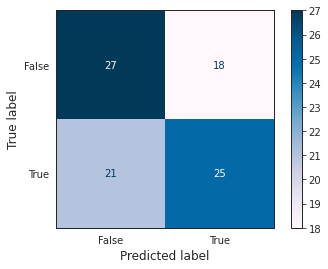

In [ ]:
X_train_predict=knn_clf.predict(X_train)
X_test_predict=knn_clf.predict(X_test)

confusion_matrix(X_test_predict,y_test)
plot_confusion_matrix(knn_clf, X_test, y_test, cmap=plt.cm.PuBu)  
plt.show()

The precision score was measured and it is around 30%.

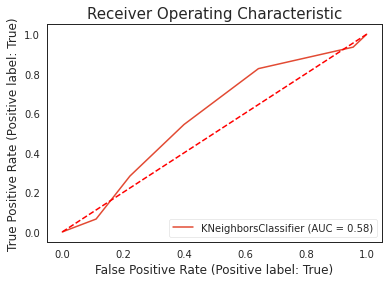

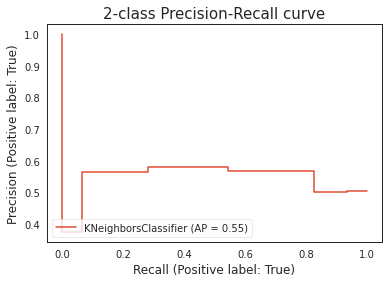

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import auc, precision_recall_curve
from sklearn import metrics 


#printing the precision 
knn_predictions = knn_clf.predict(X_test)
knn_acc = accuracy_score(y_test, knn_predictions)


#Receiver Operating Characteristic
RocCurveDisplay.from_estimator(knn_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("Receiver Operating Characteristic", fontsize=15)
plt.show()

#2-Class Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(knn_clf, X_test, y_test)
plt.title("2-class Precision-Recall curve", fontsize=15)
plt.show()

To have more information about our machine learning model, we plotted the Receiver Operation Characteristic and 2-Class Precision-Recall Curve.
The AUC value is 0.87, as can be seen in the graph.Between 0.1 and 0.2 False positive section, the true positive rate increases significantly, and beyond 0. The better the accuracy, the lower the number of false positive predictions.

### Accuracy Testing

In [ ]:
print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 78.30%
_______________________________________________
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.803571   0.760000  0.783019    0.781786      0.783430
recall       0.789474   0.775510  0.783019    0.782492      0.783019
f1-score     0.796460   0.767677  0.783019    0.782068      0.783155
support    114.000000  98.000000  0.783019  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[90 24]
 [22 76]]

Test Result:
Accuracy Score: 57.14%
_______________________________________________
CLASSIFICATION REPORT:
               False       True  accuracy  macro avg  weighted avg
precision   0.562500   0.581395  0.571429   0.571948      0.572051
recall      0.600000   0.543478  0.571429   0.571739      0.571429
f1-score    0.580645   0.561798  0.571429   0.571221      0.571118
support    45.000000  46.000000  0.571429  91.000000     91.000000
_________________

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.622642,92.307692
1,K-nearest neighbors,78.301887,57.142857


### Hyper Tunning

In [ ]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    #test_score.append(accuracy_score(y_test, model.predict(X_test)))

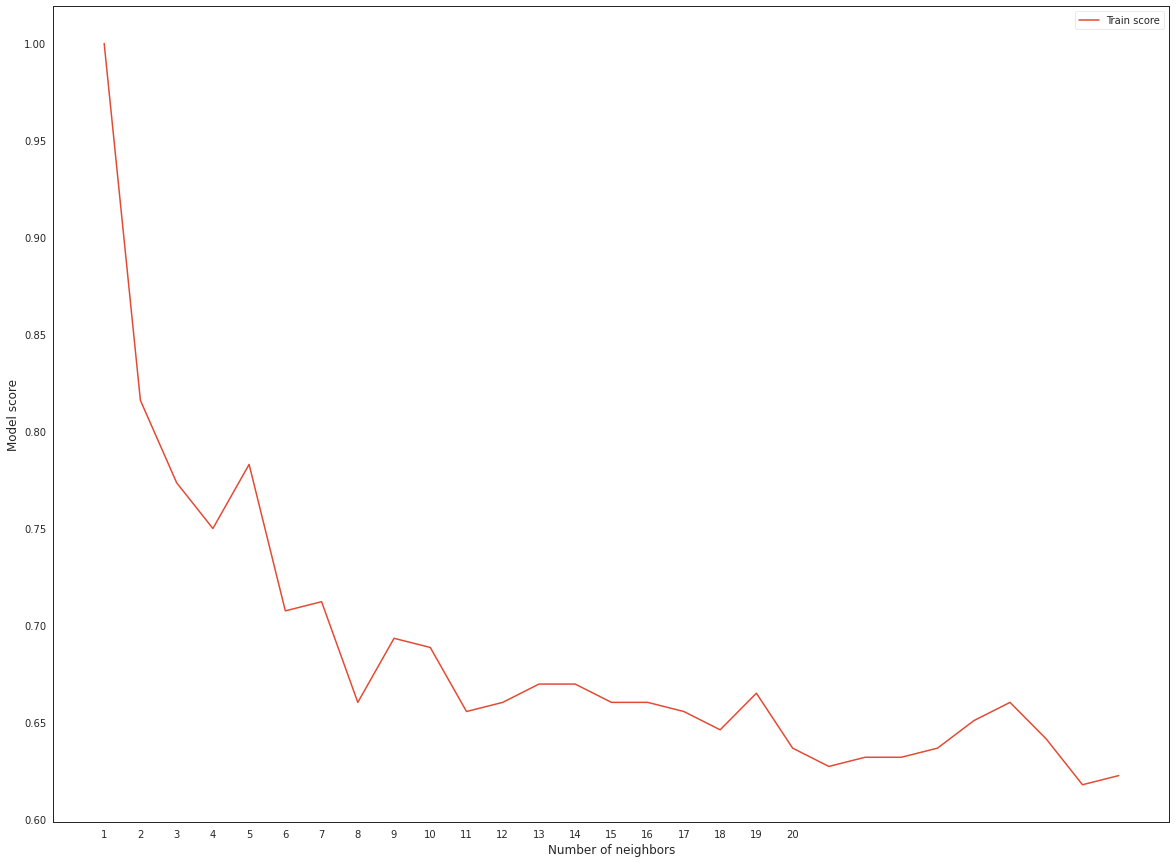

In [ ]:
plt.figure(figsize=(20, 15))

plt.plot(neighbors, train_score, label="Train score")
#plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()



In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 64.15%
_______________________________________________
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.637681   0.648649  0.641509    0.643165      0.642751
recall       0.771930   0.489796  0.641509    0.630863      0.641509
f1-score     0.698413   0.558140  0.641509    0.628276      0.633569
support    114.000000  98.000000  0.641509  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[88 26]
 [50 48]]

Test Result:
Accuracy Score: 49.45%
_______________________________________________
CLASSIFICATION REPORT:
               False       True  accuracy  macro avg  weighted avg
precision   0.491525   0.500000  0.494505   0.495763      0.495809
recall      0.644444   0.347826  0.494505   0.496135      0.494505
f1-score    0.557692   0.410256  0.494505   0.483974      0.483164
support    45.000000  46.000000  0.494505  91.000000     91.000000
_________________

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,90.094340,93.406593
1,Tuned K-nearest neighbors,64.150943,49.450549


## **Random Forest**

Random Forest is the supervised learning algorithm. It is used to construct many decision trees and blend them together to get a more accurate and reliable forecast.

#### Initial testing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


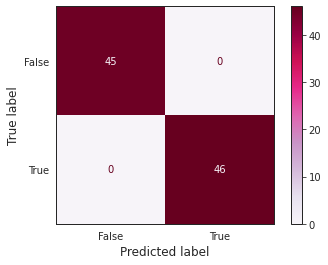

In [ ]:
X_train_predict=rf_clf.predict(X_train)
X_test_predict=rf_clf.predict(X_test)

plot_confusion_matrix(rf_clf, X_test, y_test, cmap=plt.cm.PuRd)  

plt.show()

The precision score was measured and it is around 50%.

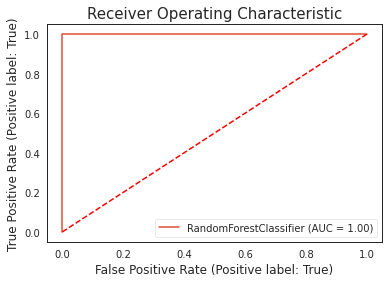

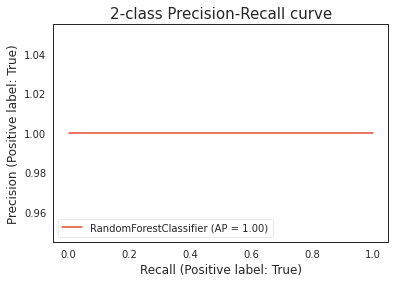

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import auc, precision_recall_curve
from sklearn import metrics 


#printing the precision 
rf_predictions = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)


#Receiver Operating Characteristic
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("Receiver Operating Characteristic", fontsize=15)
plt.show()

#2-Class Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(rf_clf, X_test, y_test)
plt.title("2-class Precision-Recall curve", fontsize=15)
plt.show()

### Feature Importance

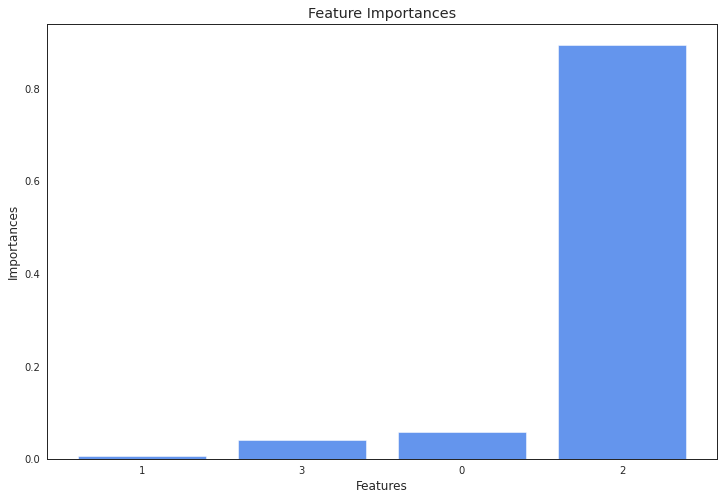

In [ ]:
#Create Sorted Importance
feature_list = list(range(X.shape[1]))
importances = list(rf_clf.feature_importances_)
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)

#Create bar chart for importances

fig, ax = plt.subplots(figsize=(12, 8))
index=np.argsort(importances)

plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importances")

arr_sorted=[]
for i in index:
  arr_sorted.append(importances[i])

x=np.arange(0,len(importances))
ax.set_xticks(x)
ax.set_xticklabels(index)

ax.bar(x,arr_sorted,color = "cornflowerblue")
plt.show()

### Accuracy Testing

In [ ]:

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           False  True  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    114.0  98.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[114   0]
 [  0  98]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           False  True  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support     45.0  46.0       1.0       91.0          91.0
_______________________________________________
Confusion Matrix: 
 [[45  0]
 [ 0 46]]



In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.622642,92.307692
1,K-nearest neighbors,78.301887,57.142857
2,Random Forest Classifier,100.000000,100.000000


### Hyper Tunning




In this part, we tried to increase the overall precision of the machine learning model by experimenting with different training function parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           False  True  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    114.0  98.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[114   0]
 [  0  98]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           False  True  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0

#****Conclusion****


  First machine learning method that we used for improving static analysis was Logistic Regression. It is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).  After categorizing the variances that causes to heart disease such as, gender, chest pain, smoking status etc. The precision score was measured, and it is around 45%. Train result with Accuracy Score was: 89.62%, test result with Accuracy Score was: 92.31%.  In our earlier example of the LogisticRegression class, we created an instance of the LogisticRegression class without passing it any initializers. Instead, we rely on the default values of the various parameters. GridSearchCV is a function in the model selection package of sklearn. When fitting your model, it allows you to provide multiple values for each hyperparameter and try out all of the conceivable combinations. GridSearchCV uses cross validation of your dataset for training and testing, thus the abbreviation "CV" in GridSearchCV. GridSearchCV produces a set of hyperparameters that best suit your data based on the scoring measure you wish to improve your model on.  In other word, our test accuracy raised to Accuracy Score: 93.41%. 
  


  The Second method that we used was KNN method. As a definition, KNN Is a Supervised Learner for Both Classification and Regression. Supervised machine learning algorithms can be split into two groups based on the type of target variable that they can predict: Classification is a prediction task with a categorical target variable. After applied precision score was measured and it is around 30%. To have more information about our machine learning model, we plotted the Receiver Operation Characteristic and 2-Class Precision-Recall Curve. The AUC value is 0.87, as can be seen in the graph. Between 0.1 and 0.2 False positive section, the true positive rate increases significantly, and beyond 0. The better the accuracy, the lower the number of false positive predictions. Furthermore, applied accuracy test came out with a test result score: 57.14%. However, when hyper tunning run into cod for supporting KNN method revealed test accuracy score decreased to 49.45%. 


  The last one method that we used was Random Forest method. As a definition, Random forests is a set of multiple decision trees. Deep decision trees may suffer from overfitting, but random forests prevent overfitting by creating trees on random subsets. Decision trees are computationally faster. The precision score was measured, and it is around 50% at initial. Then, Feature Importance was added into step.  For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. This method is available in scikit-learn implementation of the Random Forest (for both classifier and regressor). It is worth to mention, that in this method we should look at relative values of the computed importances. This biggest advantage of this method is a speed of computation - all needed values are computed during the Radom Forest training. Finally, Accuracy testing score and hyper tunned accuracy testing score was 100.00%.   